<a href="https://colab.research.google.com/github/EvanM19/Projet-scoring/blob/main/features_selection_evan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np


warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

### Visualisation générale

In [289]:
samples = pd.read_excel('/content/drive/My Drive/samples.xlsx', sheet_name=None)

colonnes_a_supprimer = [
    'id_client', 'CRTOC_AG_MVTAFF_IND_0010', 'CRTOC_IND_0010', 'CRTOC_IND_0164',
    'CRTOD_CMT_PRO_IND_0209', 'CRTOP_AG_IND_0038', 'CRTOP_IND_0038',
    'CRTOU_CCT_PRO_IND_0209', 'DATCREENT', 'DATRLNORG', 'INDPARDCD',
    'RATIO1', 'RATIO3', 'TOP_PRO_ACTIF', 'IND_ACTIF', 'IND_PER_PM',
    'CODCMNIEE', 'CODPAY_NAISSANCE', 'CODPAY_NATIONALITE', 'CODPAY_RESIDENCE',
    'CODSEXPRS', 'secteur_activite', 'secteur_activite_bis', 'CODTYPPRS'
]

samples = samples
train = samples[list(samples.keys())[0]]
train = train.drop(columns=colonnes_a_supprimer)
test = samples[list(samples.keys())[1]]
test = test.drop(columns=colonnes_a_supprimer)
oot = samples[list(samples.keys())[2]]
oot = oot.drop(columns=colonnes_a_supprimer)
sample = pd.concat([train, test, oot], ignore_index=True)

In [290]:
print(sample.shape)
print(sample.dtypes)
sample.describe()

(26233, 43)
DDefaut_NDB                             int64
datdelhis                               int64
AGEPRS                                  int64
ANCIENNETE                              int64
CODETAJUR                               int64
CODITDBDF_PRO                           int64
CODNAF2                                object
CRTAD_AG_MVTAFF_IND_0010                int64
CRTAD_AG_NBECR_A                        int64
CRTAD_AG_NBECR_B                        int64
CRTAD_AG_NBJDE_BA                       int64
CRTAD_AG_NBJDE_BB                       int64
CRTAD_AG_NBJDE_BC                       int64
CRTAD_AG_SOLDE_IND_0009                 int64
CRTAD_AG_SOLDE_T                        int64
CRTAD_AG_SOLDE_T1                       int64
CRTAD_AG_SOLDE_T2                       int64
CRTAD_AG_SOLDE_T3                       int64
CRTAD_AG_SOLDE_T4                       int64
CRTAD_IND_0015                          int64
CRTAD_IND_0038                          int64
CRTAD_IND_0062        

,DDefaut_NDB,datdelhis,AGEPRS,ANCIENNETE,CODETAJUR,CODITDBDF_PRO,CRTAD_AG_MVTAFF_IND_0010,CRTAD_AG_NBECR_A,CRTAD_AG_NBECR_B,CRTAD_AG_NBJDE_BA,CRTAD_AG_NBJDE_BB,CRTAD_AG_NBJDE_BC,CRTAD_AG_SOLDE_IND_0009,CRTAD_AG_SOLDE_T,CRTAD_AG_SOLDE_T1,CRTAD_AG_SOLDE_T2,CRTAD_AG_SOLDE_T3,CRTAD_AG_SOLDE_T4,CRTAD_IND_0015,CRTAD_IND_0038,CRTAD_IND_0062,CRTAD_IND_0205,CRTAE_AG_SLDEPA,CRTAR_IND_0036,CRTOC_AG_LIGCRE_2T_IND_0009,CRTOC_AG_LIGCRE_IND_0009,CRTOC_AG_LIGDEB_2T_IND_0015,CRTOC_AG_LIGDEB_IND_0015,CRTOC_AG_MVTAFF_2T_IND_0010,CRTOC_AG_NBJCRE_2T_IND_0009,CRTOC_AG_NBJDEB_2T_IND_0015,CRTOC_AG_NBJDEB_IND_0015,CRTOC_IND_0015,CRTOC_IND_0301,CRTOC_MOY_MVTAFF_IND_0010,CRTOC_SLD_MOY,CRTOD_CMT_IND_0036,MINSOLDE_PAR,NBECR_PAR,CRTAD_IND_0042,CODACVPRO,DATCREPRSENT
count,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,2.623300e+04,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,26233.000000,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,26233.000000,26233.000000,26233.000000,19476
mean,0.060001,202304.516792,12.859566,140.544162,4618.911829,0.012427,4.867374e+05,27.836466,26.644379,23.051729,4.703160,4.501353,4.326886e+05,3.225908e+05,3.363672e+05,3.462446e+05,3.475285e+05,3.211737e+05,1.566043,4.106659e+05,2.305531e+03,1.983490e+05,4.949561e+05,7.647718e+04,1.159902e+09,1.956872e+08,-1.811834e+07,-2.756064e+06,8.692520e+06,166.297717,16.986696,8.691267,2.968742,3.368582,2.660246e+06,6.295176e+06,1.669282e+06,1.754465e+05,-0.380208,9.399802,854.826059,2012-09-18 10:14:20.628465920
min,0.000000,202301.000000,0.000000,0.000000,1100.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.375800e+07,-2.240933e+07,-2.550667e+07,-1.509000e+07,-5.788833e+06,0.000000,-1.780000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.091196e+11,-1.510892e+10,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.194045e+08,0.000000e+00,-2.550667e+07,-562.000000,0.000000,0.000000,1900-01-01 00:00:00
25%,0.000000,202303.000000,0.000000,40.000000,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.043699e+07,5.946610e+06,-4.500000e+03,-1.158300e+04,3.000000e+05,173.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.557510e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2008-10-21 18:00:00
50%,0.000000,202305.000000,0.000000,94.000000,5499.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.352389e+08,4.161053e+07,0.000000e+00,0.000000e+00,2.130540e+06,182.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05,1.304663e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2015-12-09 00:00:00
75%,0.000000,202307.000000,25.000000,197.000000,5710.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010128e+09,1.710486e+08,0.000000e+00,0.000000e+00,6.347500e+06,184.000000,1.000000,0.000000,0.000000,0.000000,1.951827e+06,5.567296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,2168.000000,2019-12-04 06:00:00
max,1.000000,202308.000000,95.000000,883.000000,9900.000000,2.000000,5.951200e+09,839.000000,896.000000,1016.000000,236.000000,232.000000,7.769740e+08,2.668670e+08,2.523410e+08,2.415587e+08,3.743125e+08,3.335600e+08,86.000000,7.7

### Etudes des valeurs manquantes

In [291]:
missing_values = sample.isnull().sum()
missing_values

,0
DDefaut_NDB,0
datdelhis,0
AGEPRS,0
ANCIENNETE,0
CODETAJUR,0
CODITDBDF_PRO,0
CODNAF2,0
CRTAD_AG_MVTAFF_IND_0010,0
CRTAD_AG_NBECR_A,0
CRTAD_AG_NBECR_B,0


In [292]:
print(sample['DATCREPRSENT'].head())
print(sample['DATCREPRSENT'].describe())
print(sample['DATCREPRSENT'].isnull().mean())

0   2002-06-01
1   2021-09-01
2   2021-01-04
3   2016-03-25
4   2019-09-17
Name: DATCREPRSENT, dtype: datetime64[ns]
count                            19476
mean     2012-09-18 10:14:20.628465920
min                1900-01-01 00:00:00
25%                2008-10-21 18:00:00
50%                2015-12-09 00:00:00
75%                2019-12-04 06:00:00
max                2023-08-31 00:00:00
Name: DATCREPRSENT, dtype: object
0.2575763351503831


25,76 % de valeurs manquantes. Par la suite on regroupera par période et on créera une autre modalité pour les valeurs manquantes.

### datdelhis

In [293]:
print(sample['datdelhis'].unique())
sample['datdelhis'] = sample['datdelhis'] % 100
print(sample['datdelhis'].unique())
sample['datdelhis'] = sample['datdelhis'].astype(str)

[202305 202301 202303 202302 202306 202304 202307 202308]
[5 1 3 2 6 4 7 8]


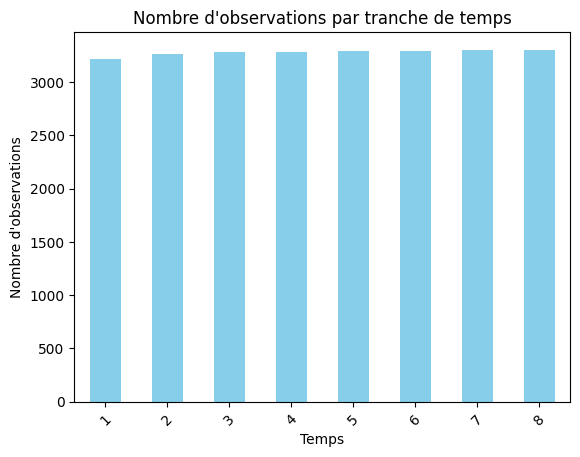

In [294]:
observations_par_tranche = sample.groupby('datdelhis').size()
observations_par_tranche.plot(kind='bar', color='skyblue')
plt.title("Nombre d'observations par tranche de temps")
plt.xlabel("Temps")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=45)
plt.show()


### AGEPRS

(array([1.9635e+04, 3.0000e+00, 2.2900e+02, 9.5400e+02, 1.5100e+03,
        1.5110e+03, 1.5220e+03, 6.7700e+02, 1.6900e+02, 2.3000e+01]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <BarContainer object of 10 artists>)

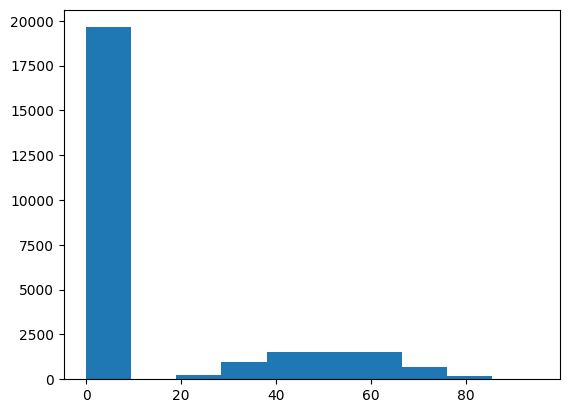

In [295]:
plt.hist(sample['AGEPRS'])

(array([  56.,  617., 1078., 1095., 1361., 1259.,  708.,  344.,   74.,
           6.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

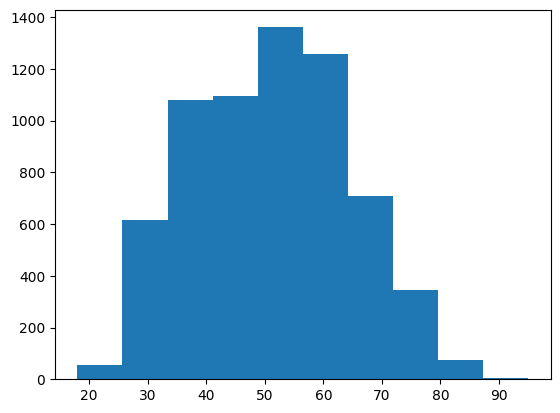

In [296]:
plt.hist(sample[sample['AGEPRS'] != 0]['AGEPRS'])

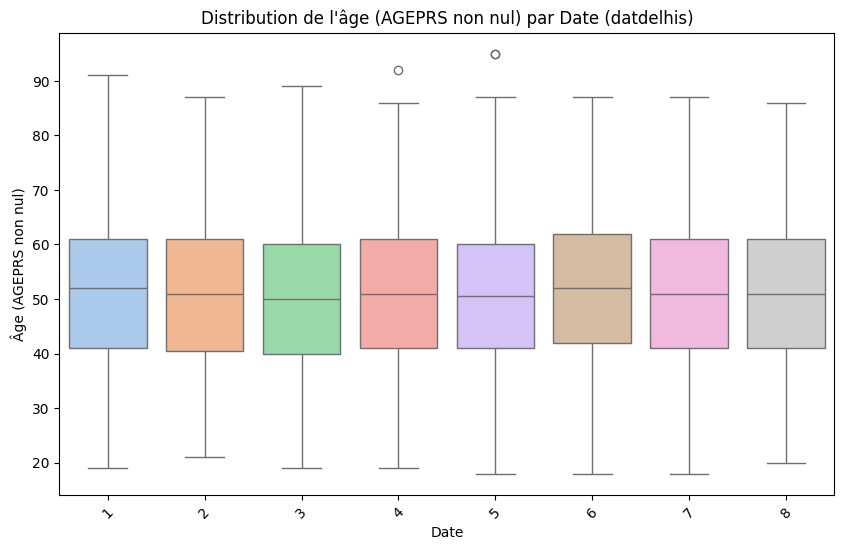

In [297]:
df = sample[sample['AGEPRS'] != 0]
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de AGEPRS par date
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='AGEPRS', data=df, palette='pastel')

# Ajouter des titres et des labels
plt.title('Distribution de l\'âge (AGEPRS non nul) par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Âge (AGEPRS non nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

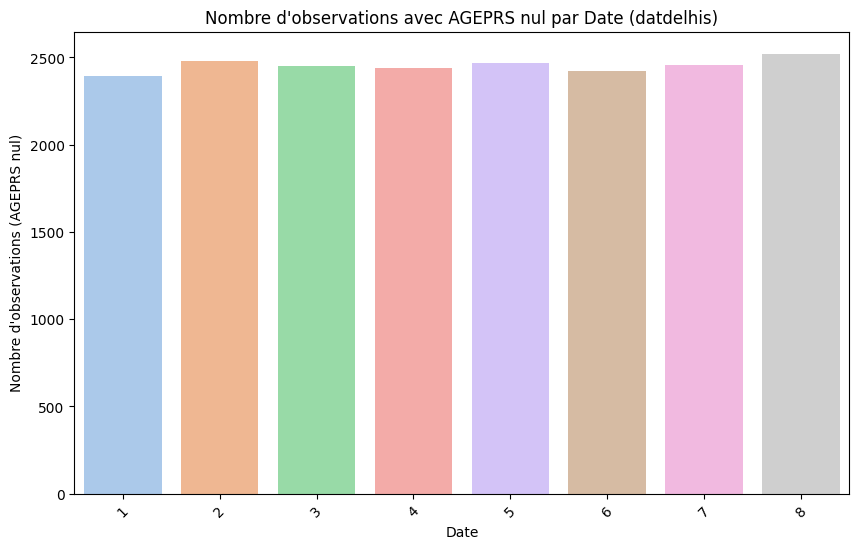

In [298]:
# Filtrer les âges égaux à 0
df = sample[sample['AGEPRS'] == 0]
df = df.sort_values('datdelhis')

# Compter le nombre d'observations par date
observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

# Créer un graphique à barres pour le nombre d'observations par date
plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')

# Ajouter des titres et des labels
plt.title('Nombre d\'observations avec AGEPRS nul par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations (AGEPRS nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates pour plus de lisibilité
plt.show()

### ANCIENNETE

(array([1.2592e+04, 6.1940e+03, 3.0200e+03, 1.7160e+03, 1.4770e+03,
        8.6000e+02, 3.0000e+02, 4.6000e+01, 7.0000e+00, 2.1000e+01]),
 array([  0. ,  88.3, 176.6, 264.9, 353.2, 441.5, 529.8, 618.1, 706.4,
        794.7, 883. ]),
 <BarContainer object of 10 artists>)

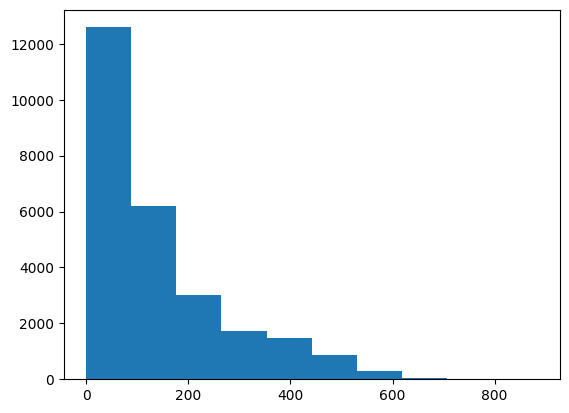

In [299]:
plt.hist(sample['ANCIENNETE'])

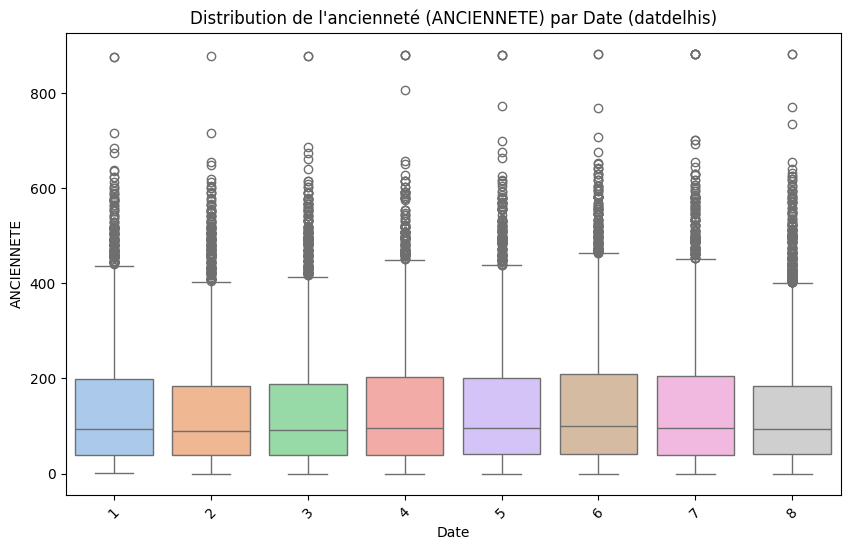

In [300]:
df = sample
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de ANCIENNETE par date
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='ANCIENNETE', data=df, palette='pastel')

# Ajouter des titres et des labels
plt.title('Distribution de l\'ancienneté (ANCIENNETE) par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('ANCIENNETE')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

### CRTOD_CMT_IND_0036 (montant des encours)

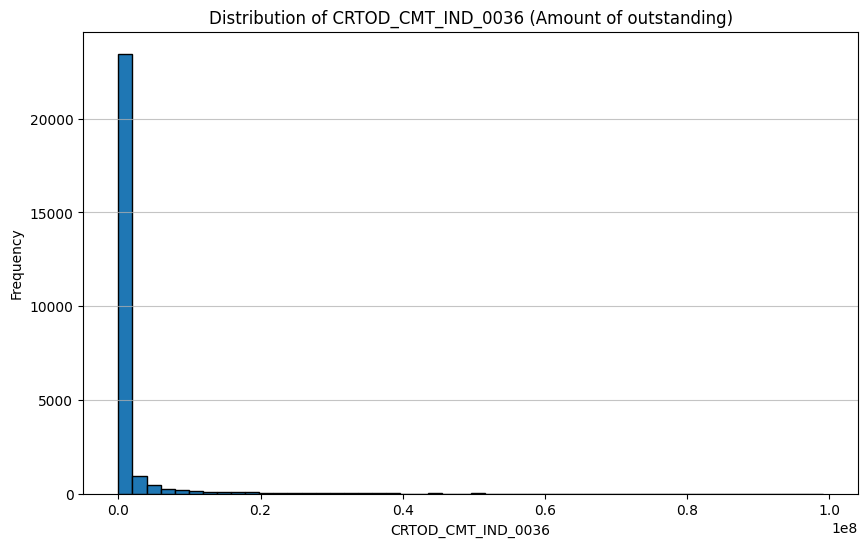

In [301]:
# ### CRTOD_CMT_IND_0036 (montant des encours)
plt.figure(figsize=(10, 6))

filtered_sample = sample
filtered_sample = filtered_sample[filtered_sample['CRTOD_CMT_IND_0036'] < 1 * 1e8]

plt.hist(filtered_sample[filtered_sample['CRTOD_CMT_IND_0036'] >= 0]['CRTOD_CMT_IND_0036'], bins=50, edgecolor='black') # Increased number of bins and added edgecolor
plt.title('Distribution of CRTOD_CMT_IND_0036 (Amount of outstanding)')
plt.xlabel('CRTOD_CMT_IND_0036')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability
plt.show()

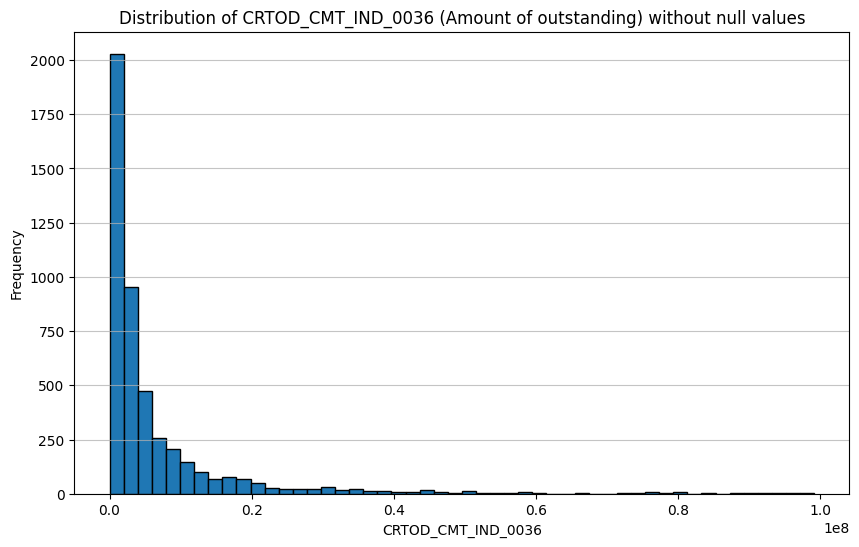

In [302]:
# ### CRTOD_CMT_IND_0036 (montant des encours)
plt.figure(figsize=(10, 6))

filtered_sample = sample[sample['CRTOD_CMT_IND_0036'] != 0]
filtered_sample = filtered_sample[filtered_sample['CRTOD_CMT_IND_0036'] < 1 * 1e8]

plt.hist(filtered_sample[filtered_sample['CRTOD_CMT_IND_0036'] >= 0]['CRTOD_CMT_IND_0036'], bins=50, edgecolor='black') # Increased number of bins and added edgecolor
plt.title('Distribution of CRTOD_CMT_IND_0036 (Amount of outstanding) without null values')
plt.xlabel('CRTOD_CMT_IND_0036')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability
plt.show()

(array([21., 14.,  6.,  5.,  9.,  2.,  0.,  0.,  0.,  2.]),
 array([1.06296928e+08, 1.57488093e+08, 2.08679257e+08, 2.59870422e+08,
        3.11061587e+08, 3.62252752e+08, 4.13443916e+08, 4.64635081e+08,
        5.15826246e+08, 5.67017410e+08, 6.18208575e+08]),
 <BarContainer object of 10 artists>)

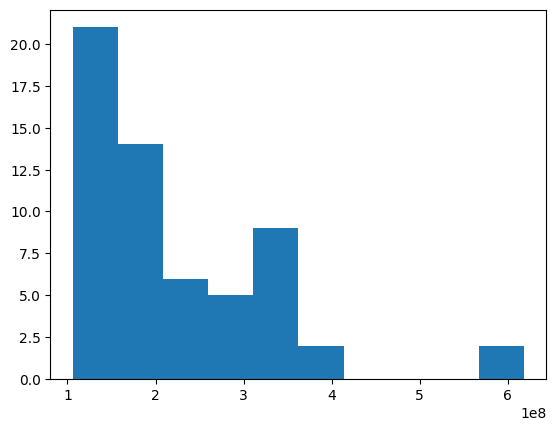

In [303]:
plt.hist(sample[sample['CRTOD_CMT_IND_0036'] >= 100000000]['CRTOD_CMT_IND_0036'])

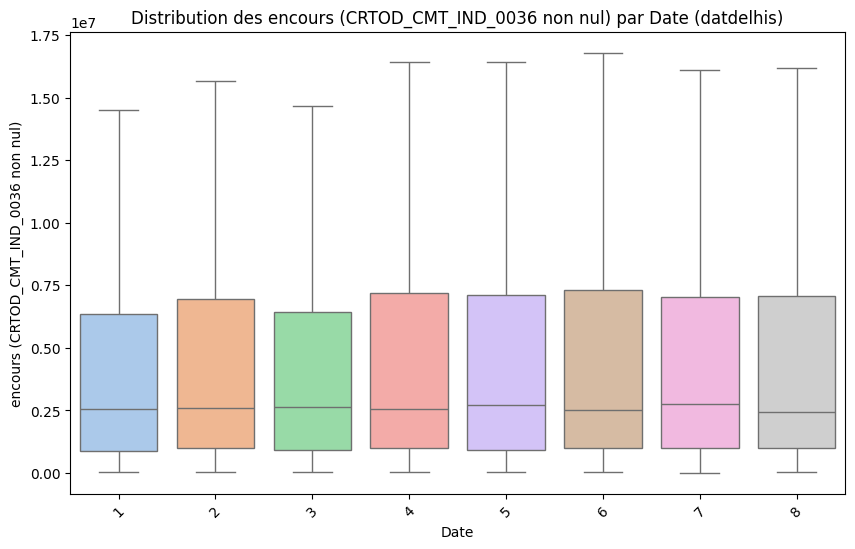

In [304]:
df = sample[sample['CRTOD_CMT_IND_0036'] != 0]
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de AGEPRS par date
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTOD_CMT_IND_0036', showfliers=False, data=df,   palette='pastel')

# Ajouter des titres et des labels
plt.title('Distribution des encours (CRTOD_CMT_IND_0036 non nul) par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('encours (CRTOD_CMT_IND_0036 non nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

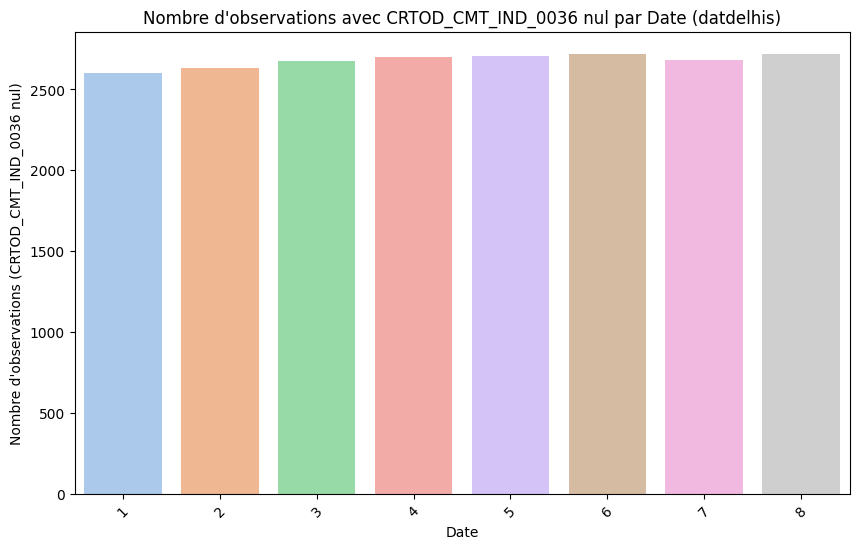

In [305]:
# Filtrer les âges égaux à 0
df = sample[sample['CRTOD_CMT_IND_0036'] == 0]
df = df.sort_values('datdelhis')

# Compter le nombre d'observations par date
observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

# Créer un graphique à barres pour le nombre d'observations par date
plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')

# Ajouter des titres et des labels
plt.title('Nombre d\'observations avec CRTOD_CMT_IND_0036 nul par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations (CRTOD_CMT_IND_0036 nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates pour plus de lisibilité
plt.show()

### CODACVPRO (catégorie socio-pro)

In [306]:
print(sample['CODACVPRO'].unique())

[   0 3128 3121 5400 3600 7300 3124 2330 3122 3127 2200 3123 4500 4600
 5600 3125 4700 7000 5100 3300 5500 2320 3500 2114 9999 7200 2150 8402
 3115 3410 8500 8400 6100 3421 3116 3114 2168 3112 3111 4300 3430 7600
 4200 3130 8401 3113 1200]


(array([1.9635e+04, 1.0000e+00, 6.3400e+02, 5.3030e+03, 1.0600e+02,
        2.1500e+02, 1.0000e+01, 2.4800e+02, 3.7000e+01, 4.4000e+01]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

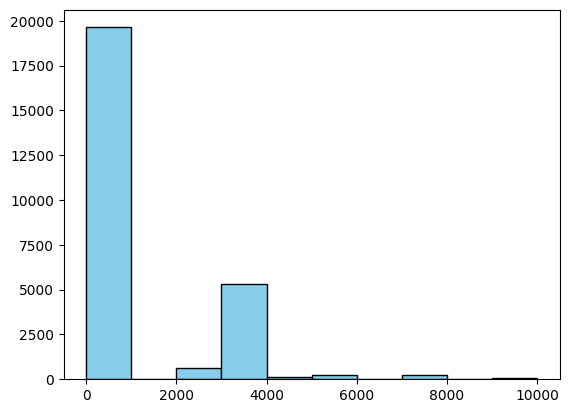

In [307]:
bins = range(0, 10001, 1000)

plt.hist(sample['CODACVPRO'], bins=bins, edgecolor='black', color='skyblue')

(array([1.000e+00, 6.340e+02, 5.303e+03, 1.060e+02, 2.150e+02, 1.000e+01,
        2.480e+02, 3.700e+01, 4.400e+01]),
 array([ 1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
         9000., 10000.]),
 <BarContainer object of 9 artists>)

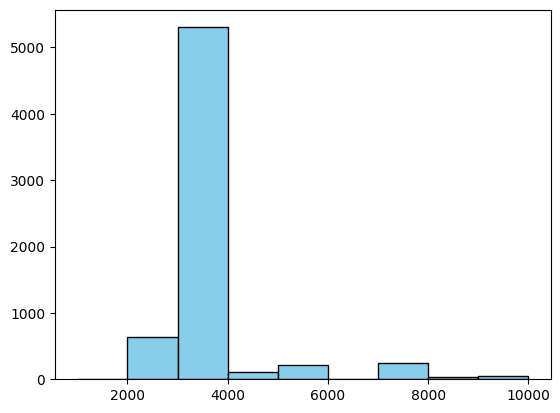

In [308]:
bins = range(1000, 10001, 1000)

plt.hist(sample[sample['CODACVPRO'] != 0]['CODACVPRO'], bins=bins, edgecolor='black', color='skyblue')

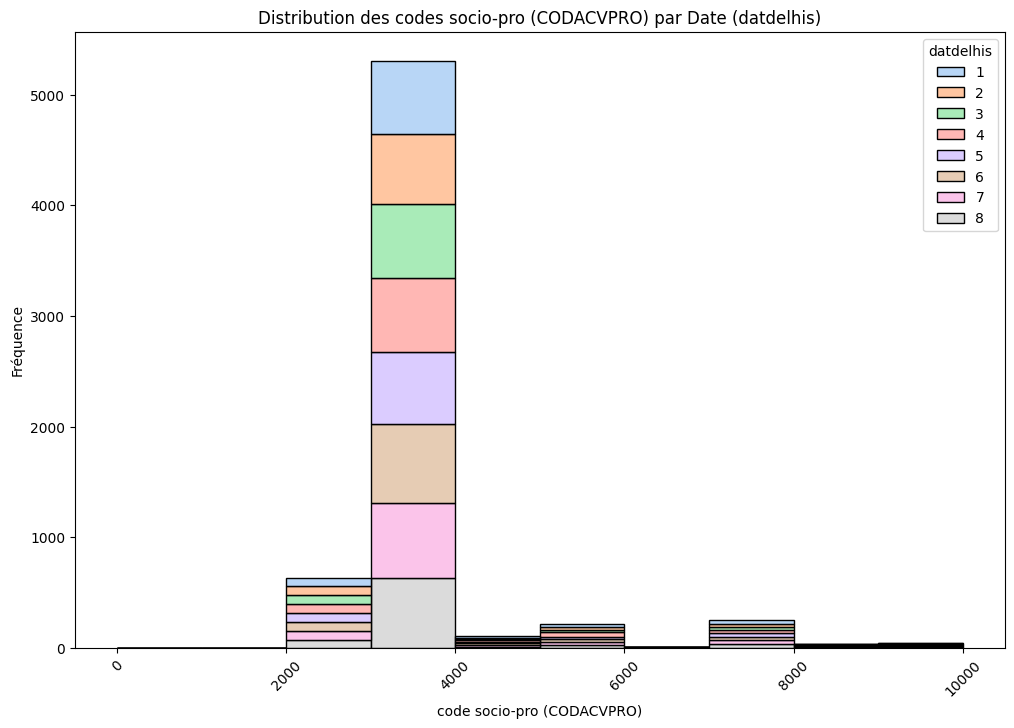

In [309]:
# Filtrer les données (exclure les valeurs 0 de CODACVPRO)
df = sample[sample['CODACVPRO'] != 0]
df = df.sort_values('datdelhis')

# Créer une figure avec un sous-ensemble de graphiques (un par date)
plt.figure(figsize=(12, 8))

# Utiliser sns.histplot pour créer un histogramme par date
sns.histplot(data=df, x='CODACVPRO', hue='datdelhis', bins=range(0, 10001, 1000), palette='pastel', multiple='stack')

# Ajouter des titres et des labels
plt.title('Distribution des codes socio-pro (CODACVPRO) par Date (datdelhis)')
plt.xlabel('code socio-pro (CODACVPRO)')
plt.ylabel('Fréquence')

# Afficher le graphique
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

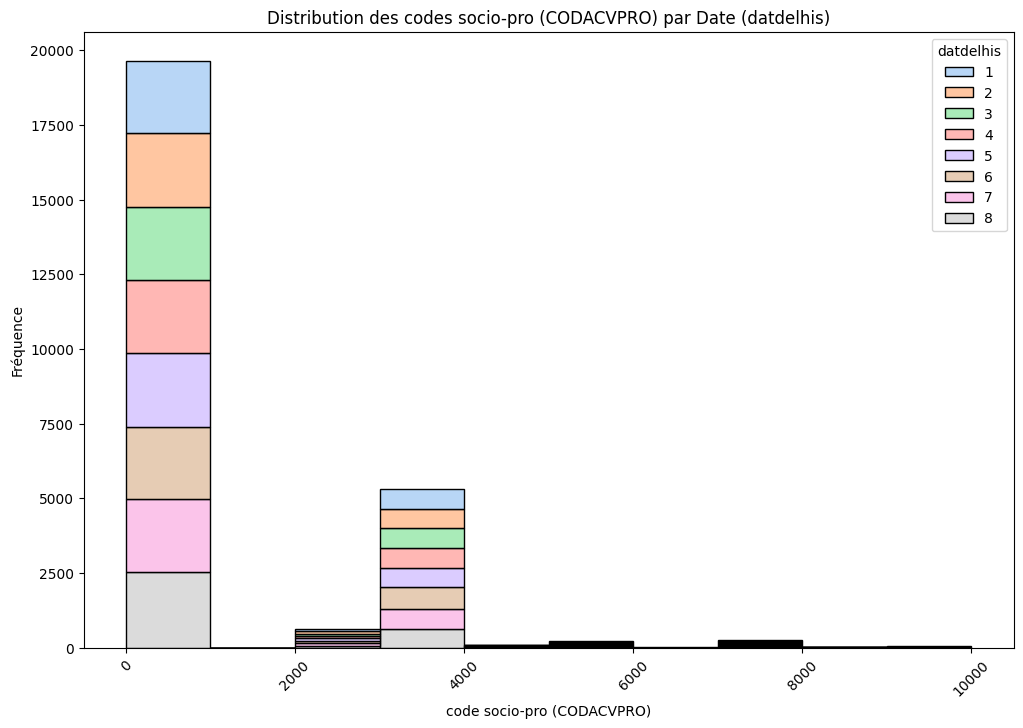

In [310]:
# Filtrer les données (exclure les valeurs 0 de CODACVPRO)
df = sample[sample['CODACVPRO'] >= 0]
df = df.sort_values('datdelhis')

# Créer une figure avec un sous-ensemble de graphiques (un par date)
plt.figure(figsize=(12, 8))

# Utiliser sns.histplot pour créer un histogramme par date
sns.histplot(data=df, x='CODACVPRO', hue='datdelhis', bins=range(0, 10001, 1000), palette='pastel', multiple='stack')

# Ajouter des titres et des labels
plt.title('Distribution des codes socio-pro (CODACVPRO) par Date (datdelhis)')
plt.xlabel('code socio-pro (CODACVPRO)')
plt.ylabel('Fréquence')

# Afficher le graphique
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

### CODNAF2

['6920Z' '7022Z' '6202A' '7021Z' '6910Z' '6622Z' '7111Z' '7112B' '6621Z'
 '7490A' '7112A' '8423Z']


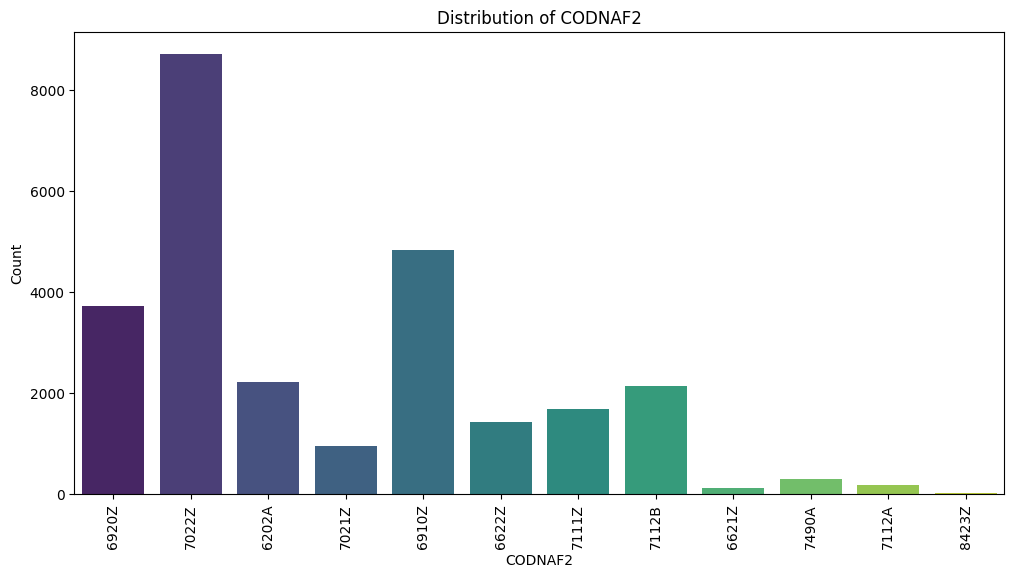

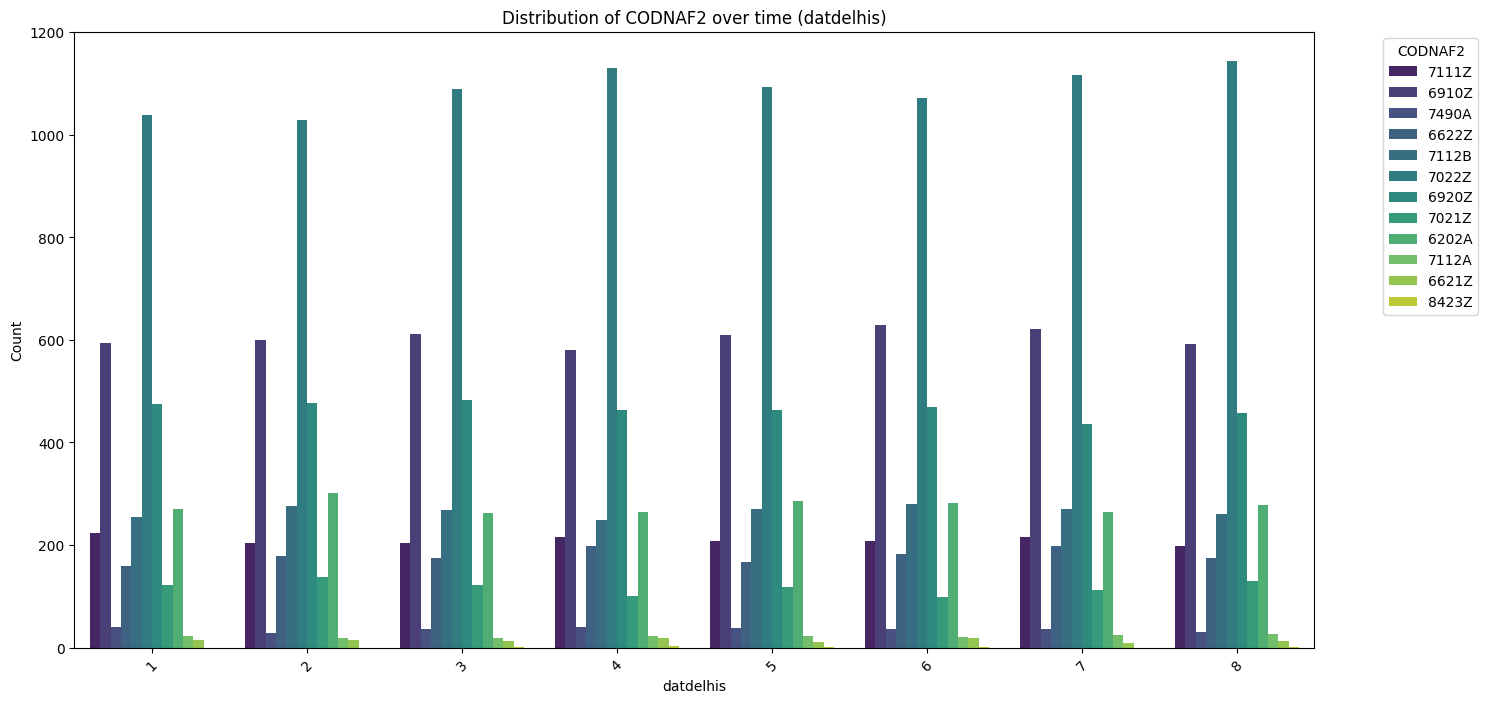

In [311]:
print(sample['CODNAF2'].unique())

# Distribution of CODNAF2
plt.figure(figsize=(12, 6))
sns.countplot(x='CODNAF2', data=sample, palette='viridis')
plt.title('Distribution of CODNAF2')
plt.xlabel('CODNAF2')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()


# Distribution of CODNAF2 over time
df = sample.sort_values('datdelhis')
plt.figure(figsize=(16, 8))
sns.countplot(x='datdelhis', hue='CODNAF2', data=df, palette='viridis')
plt.title('Distribution of CODNAF2 over time (datdelhis)')
plt.xlabel('datdelhis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CODNAF2', bbox_to_anchor=(1.05, 1), loc='upper left') # Place the legend outside the plot
plt.show()

### CRTAD_AG_MVTAFF_IND_0010

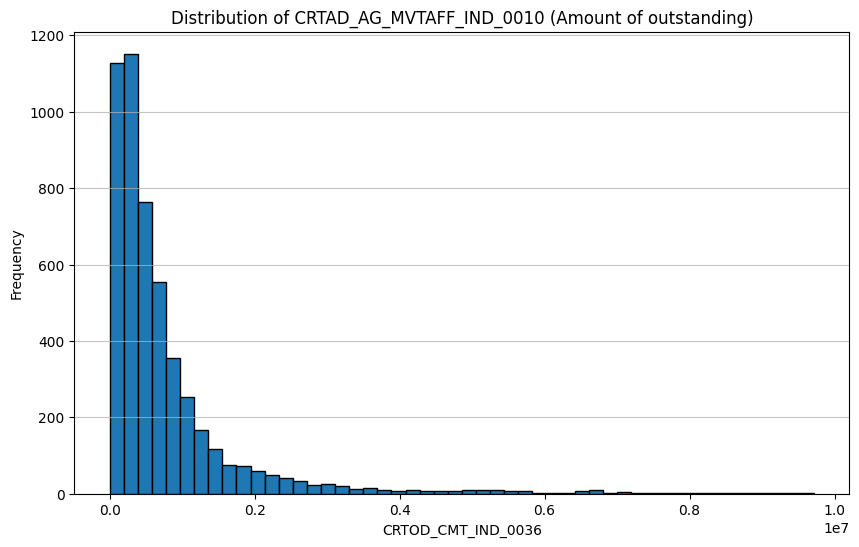

In [312]:
# ### CRTOD_CMT_IND_0036 (montant des encours)
plt.figure(figsize=(10, 6))

filtered_sample = sample
filtered_sample = filtered_sample[filtered_sample['CRTAD_AG_MVTAFF_IND_0010'] < 1 * 1e7]
filtered_sample = filtered_sample[filtered_sample['CRTAD_AG_MVTAFF_IND_0010'] != 0]

plt.hist(filtered_sample[filtered_sample['CRTAD_AG_MVTAFF_IND_0010'] >= 0]['CRTAD_AG_MVTAFF_IND_0010'], bins=50, edgecolor='black') # Increased number of bins and added edgecolor
plt.title('Distribution of CRTAD_AG_MVTAFF_IND_0010 (Amount of outstanding)')
plt.xlabel('CRTOD_CMT_IND_0036')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability
plt.show()

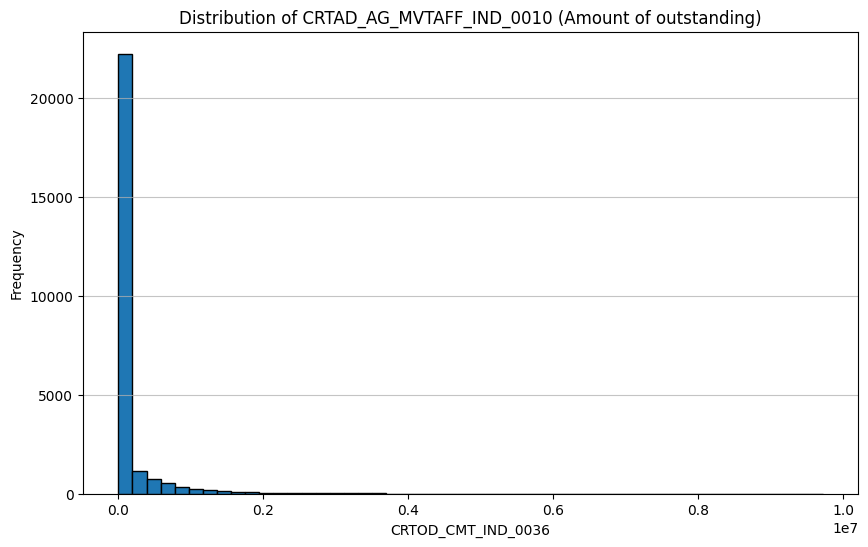

In [313]:
# ### CRTOD_CMT_IND_0036 (montant des encours)
plt.figure(figsize=(10, 6))

filtered_sample = sample
filtered_sample = filtered_sample[filtered_sample['CRTAD_AG_MVTAFF_IND_0010'] < 1 * 1e7]

plt.hist(filtered_sample[filtered_sample['CRTAD_AG_MVTAFF_IND_0010'] >= 0]['CRTAD_AG_MVTAFF_IND_0010'], bins=50, edgecolor='black') # Increased number of bins and added edgecolor
plt.title('Distribution of CRTAD_AG_MVTAFF_IND_0010 (Amount of outstanding)')
plt.xlabel('CRTOD_CMT_IND_0036')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability
plt.show()

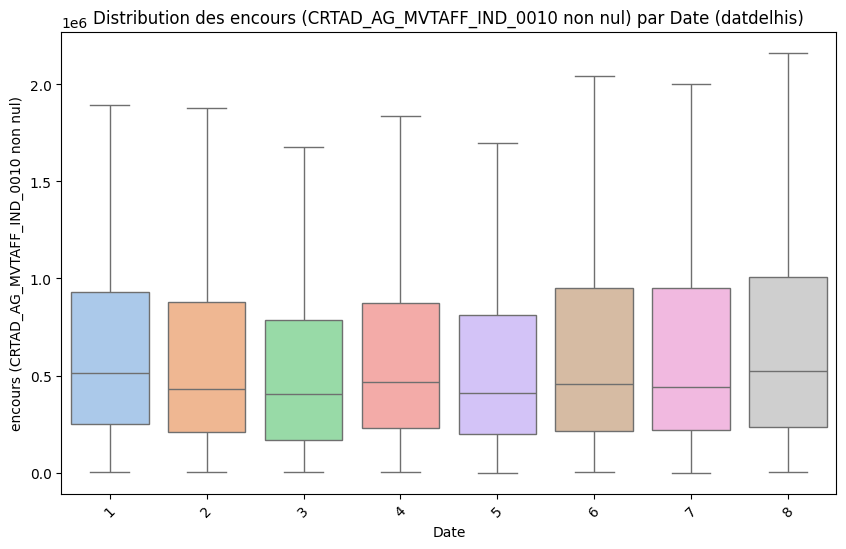

In [314]:
df = sample[sample['CRTAD_AG_MVTAFF_IND_0010'] != 0]
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de AGEPRS par date
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_MVTAFF_IND_0010', showfliers=False, data=df,   palette='pastel')

# Ajouter des titres et des labels
plt.title('Distribution des encours (CRTAD_AG_MVTAFF_IND_0010 non nul) par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('encours (CRTAD_AG_MVTAFF_IND_0010 non nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

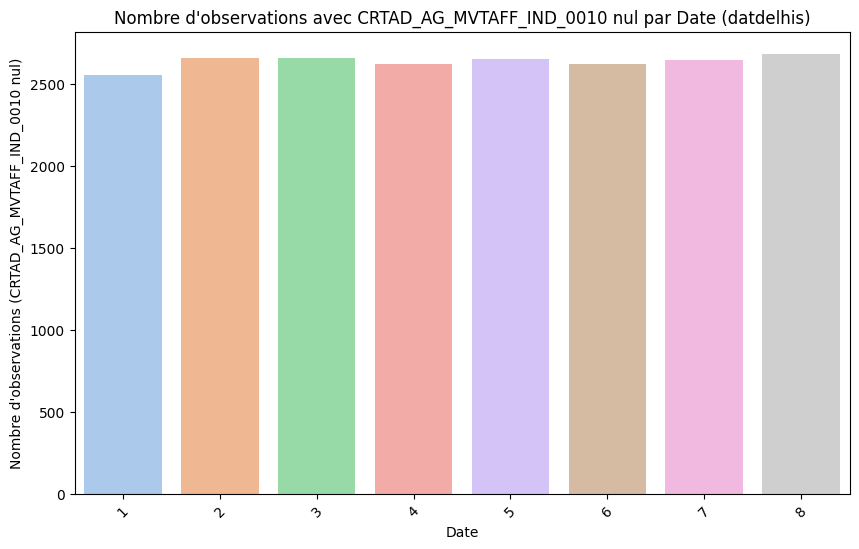

In [315]:
# Filtrer les âges égaux à 0
df = sample[sample['CRTAD_AG_MVTAFF_IND_0010'] == 0]
df = df.sort_values('datdelhis')

# Compter le nombre d'observations par date
observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

# Créer un graphique à barres pour le nombre d'observations par date
plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')

# Ajouter des titres et des labels
plt.title('Nombre d\'observations avec CRTAD_AG_MVTAFF_IND_0010 nul par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations (CRTAD_AG_MVTAFF_IND_0010 nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates pour plus de lisibilité
plt.show()

### CODETAJUR

[5499 5498 5710 5485 5785 1900 1500 5720 1200 1990 6562 5599 9100 6599
 6565 1400 5770 1290 6585 1700 9900 8300 1390 6564 6220 5470 6566 2210
 6577 6540 3220 5410 6561 5700 3120 2310 9220 9200 8311 1800 9224 1100
 8400 5460 5202 2385 5585 5685 6589 6568 3200 5400 6569 8310 5699 6500
 5600 1600 5510 1300 9110 6563 9210 2300 6578 5458 5552 5308 6901 5385
 3290 2320]


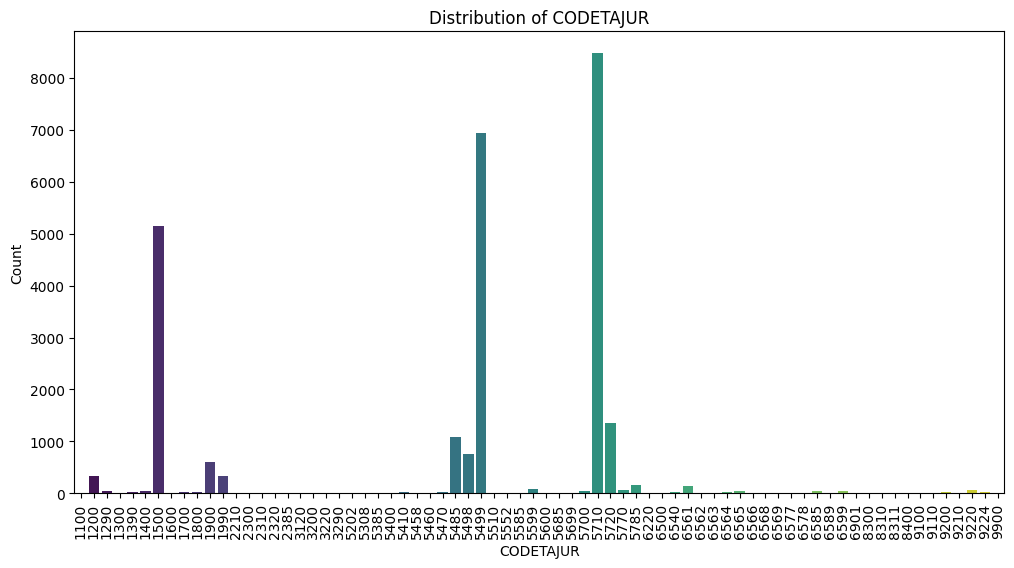

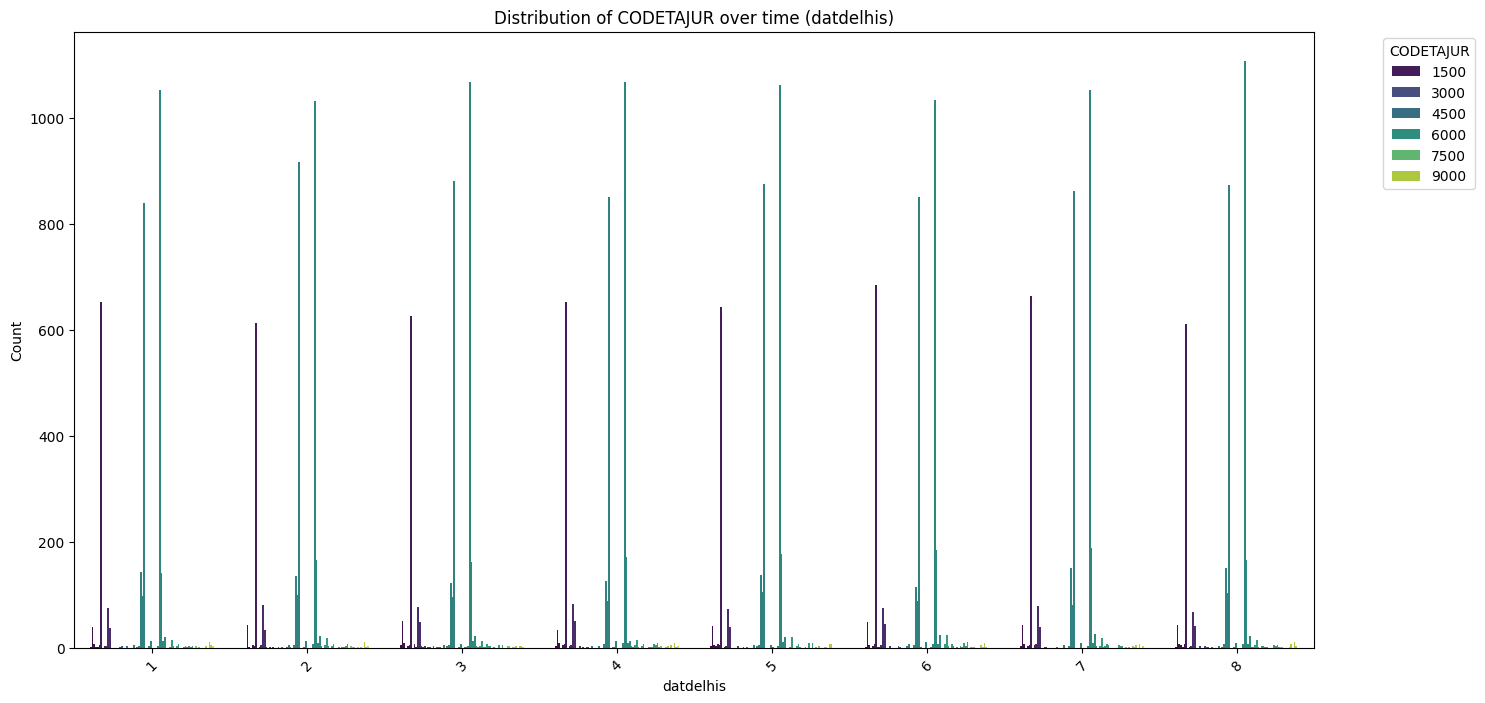

In [316]:
# ### CODETAJUR
print(sample['CODETAJUR'].unique())

# Distribution of CODETAJUR
plt.figure(figsize=(12, 6))
sns.countplot(x='CODETAJUR', data=sample, palette='viridis')
plt.title('Distribution of CODETAJUR')
plt.xlabel('CODETAJUR')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()


# Distribution of CODETAJUR over time
df = sample.sort_values('datdelhis')
plt.figure(figsize=(16, 8))
sns.countplot(x='datdelhis', hue='CODETAJUR', data=df, palette='viridis')
plt.title('Distribution of CODETAJUR over time (datdelhis)')
plt.xlabel('datdelhis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CODETAJUR', bbox_to_anchor=(1.05, 1), loc='upper left') # Place the legend outside the plot
plt.show()

### CRTAD_AG_NBECR_B

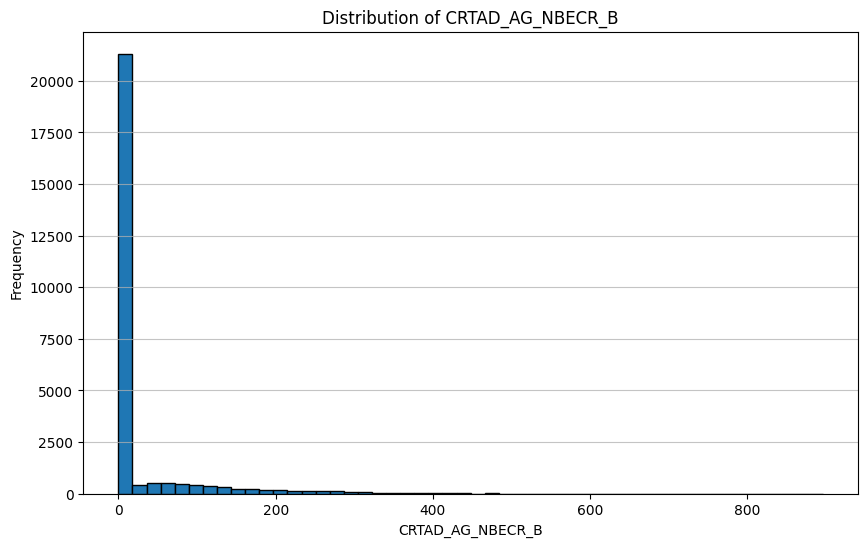

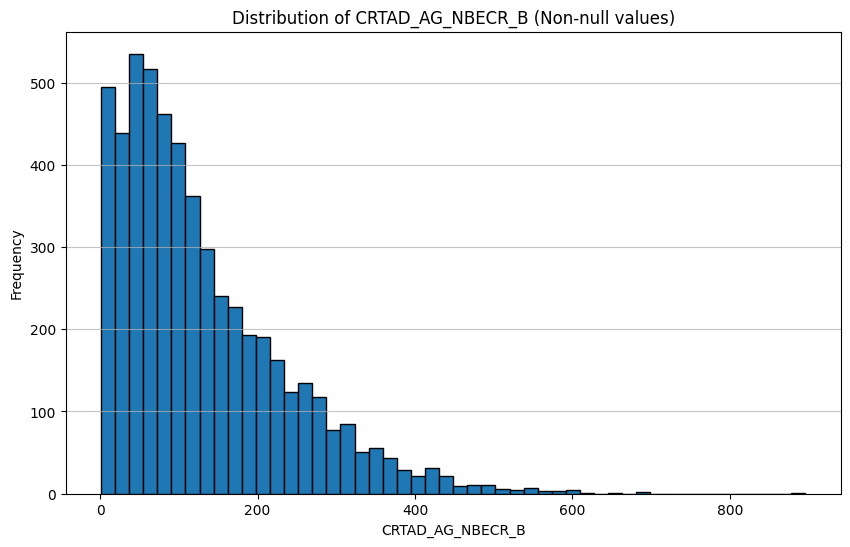

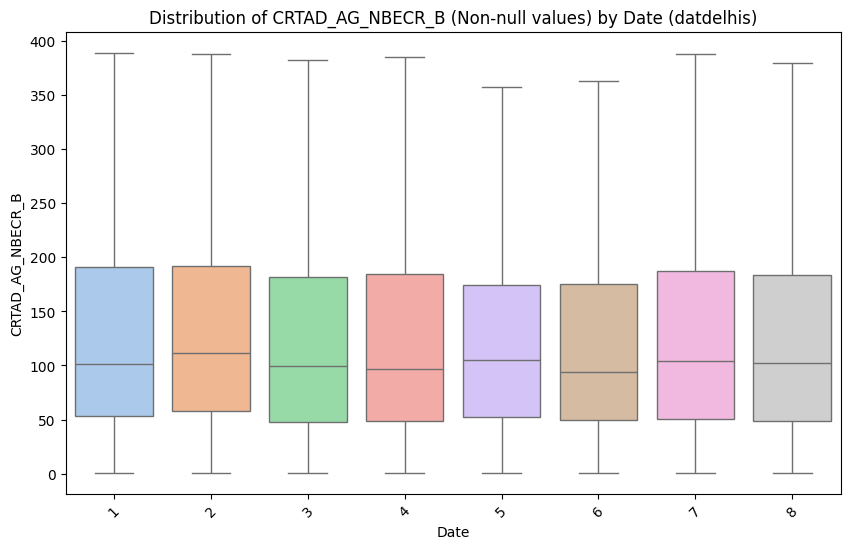

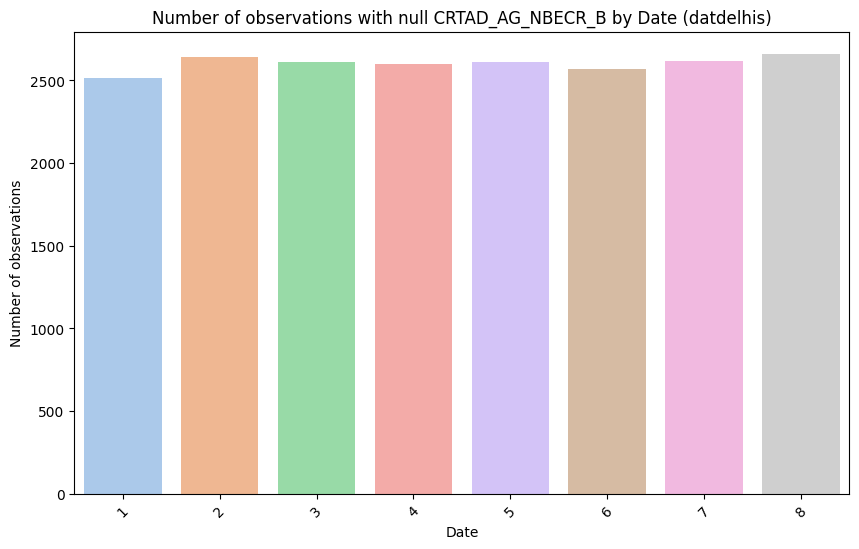

In [317]:
# Analyse de CRTAD_AG_NBECR_B

# Distribution de CRTAD_AG_NBECR_B
plt.figure(figsize=(10, 6))
plt.hist(sample['CRTAD_AG_NBECR_B'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBECR_B')
plt.xlabel('CRTAD_AG_NBECR_B')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(sample[sample['CRTAD_AG_NBECR_B'] != 0]['CRTAD_AG_NBECR_B'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBECR_B (Non-null values)')
plt.xlabel('CRTAD_AG_NBECR_B')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_NBECR_B par date
df = sample[sample['CRTAD_AG_NBECR_B'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_NBECR_B', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_NBECR_B (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_NBECR_B')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_NBECR_B nul par date
df = sample[sample['CRTAD_AG_NBECR_B'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_NBECR_B by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_NBECR_A

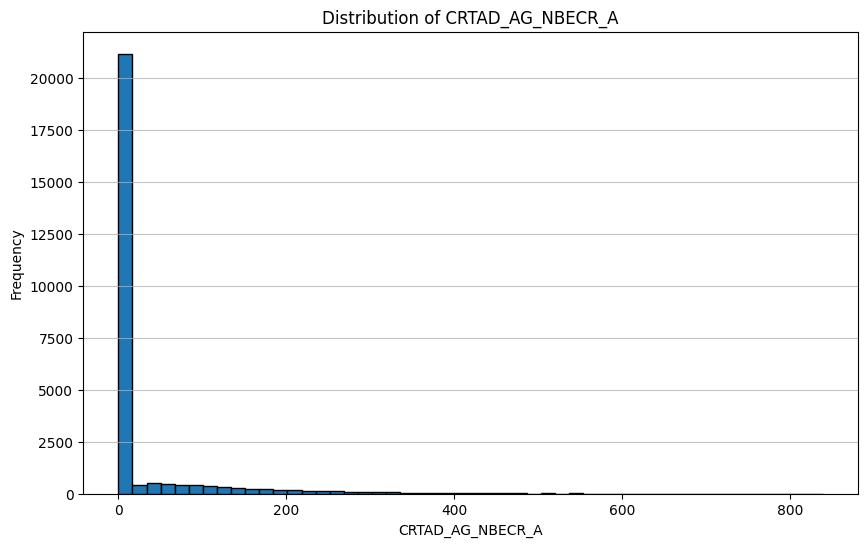

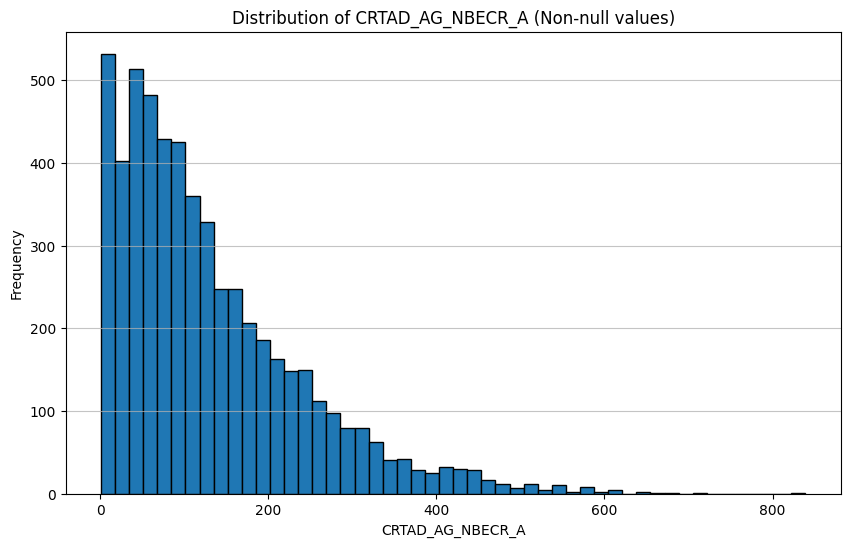

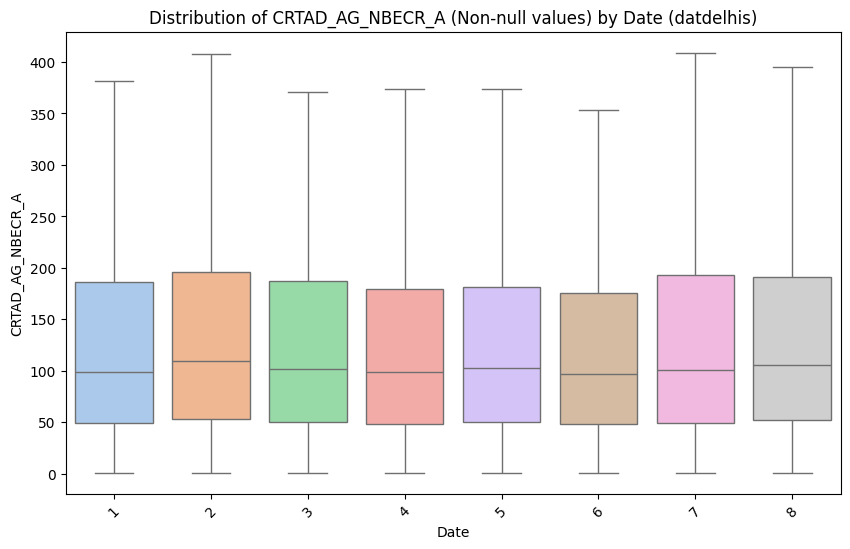

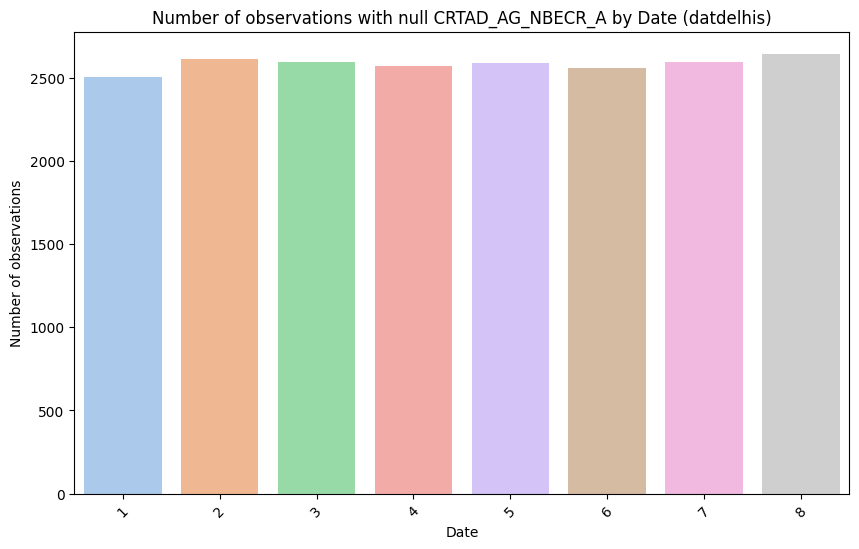

In [318]:
# Analyse de CRTAD_AG_NBECR_A

# Distribution de CRTAD_AG_NBECR_A
plt.figure(figsize=(10, 6))
plt.hist(sample['CRTAD_AG_NBECR_A'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBECR_A')
plt.xlabel('CRTAD_AG_NBECR_A')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(sample[sample['CRTAD_AG_NBECR_A'] != 0]['CRTAD_AG_NBECR_A'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBECR_A (Non-null values)')
plt.xlabel('CRTAD_AG_NBECR_A')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_NBECR_A par date
df = sample[sample['CRTAD_AG_NBECR_A'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_NBECR_A', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_NBECR_A (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_NBECR_A')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_NBECR_A nul par date
df = sample[sample['CRTAD_AG_NBECR_A'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_NBECR_A by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### NBECR_PAR

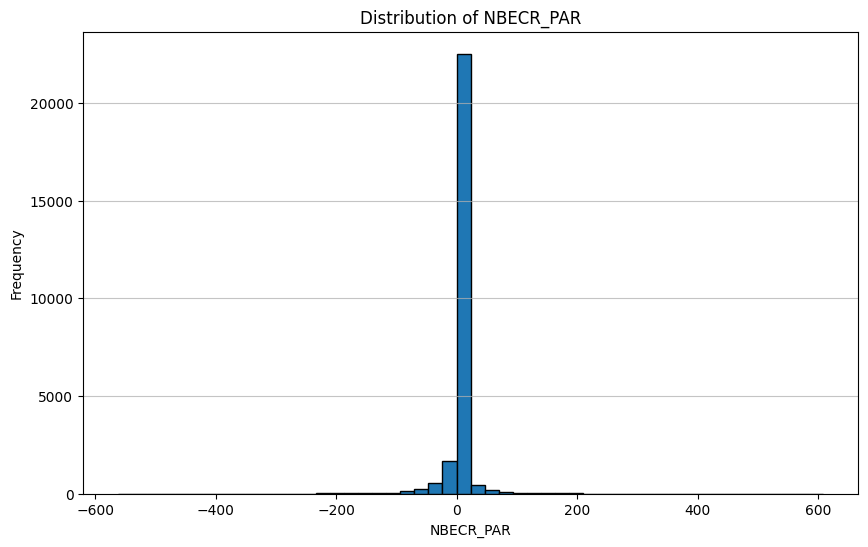

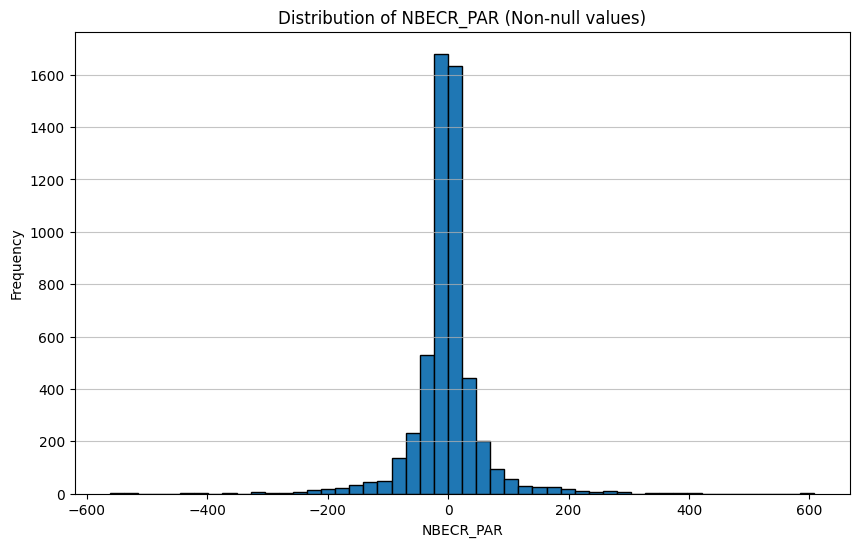

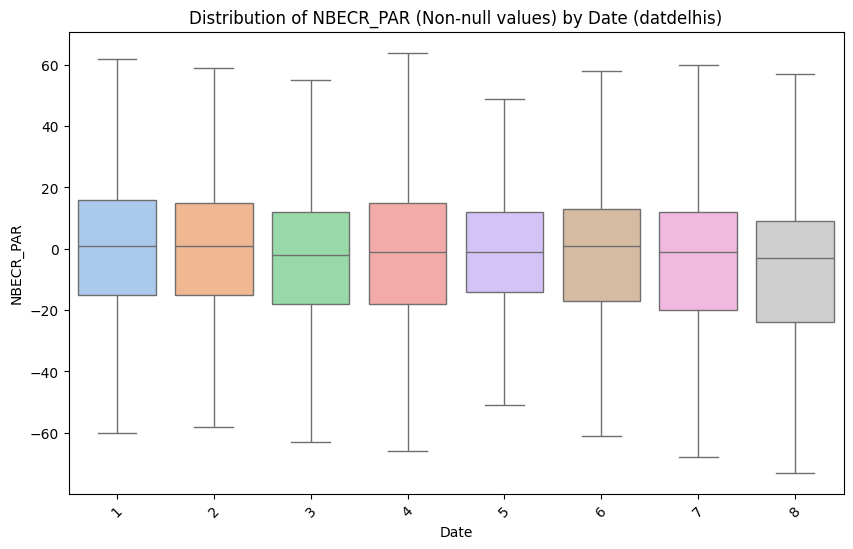

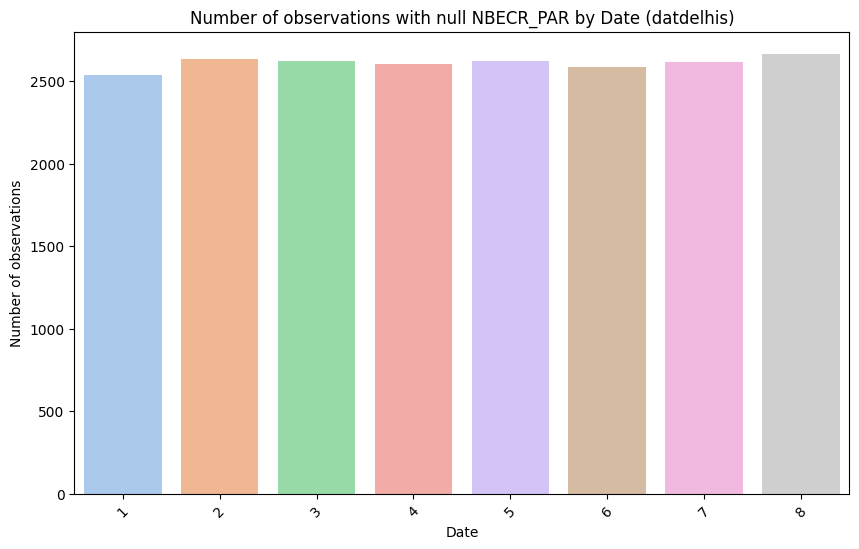

In [319]:
# Analyse de NBECR_PAR

# Distribution de NBECR_PAR
plt.figure(figsize=(10, 6))
plt.hist(sample['NBECR_PAR'], bins=50, edgecolor='black')
plt.title('Distribution of NBECR_PAR')
plt.xlabel('NBECR_PAR')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(sample[sample['NBECR_PAR'] != 0]['NBECR_PAR'], bins=50, edgecolor='black')
plt.title('Distribution of NBECR_PAR (Non-null values)')
plt.xlabel('NBECR_PAR')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de NBECR_PAR par date
df = sample[sample['NBECR_PAR'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='NBECR_PAR', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of NBECR_PAR (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('NBECR_PAR')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec NBECR_PAR nul par date
df = sample[sample['NBECR_PAR'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null NBECR_PAR by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CODITDBDF_PRO

[0 2]


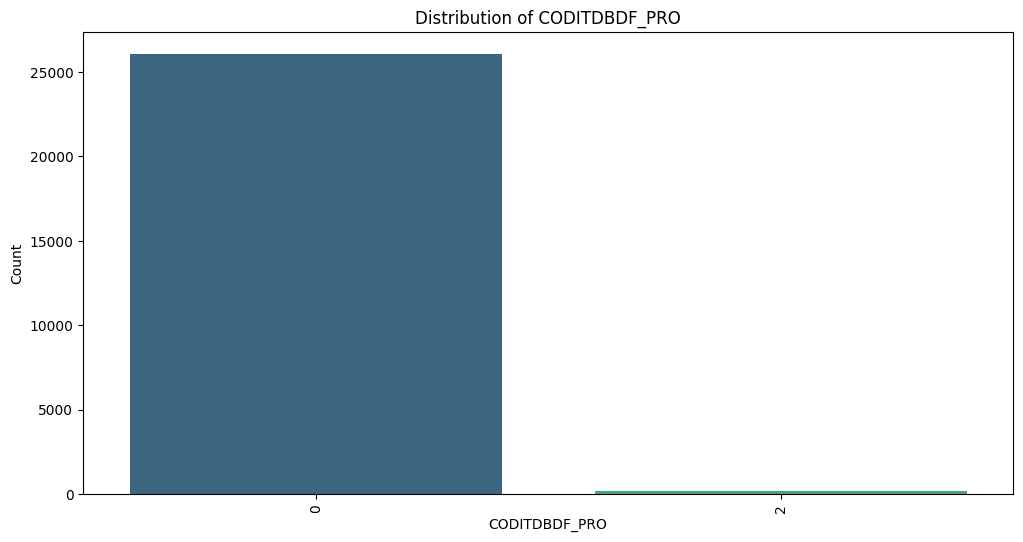

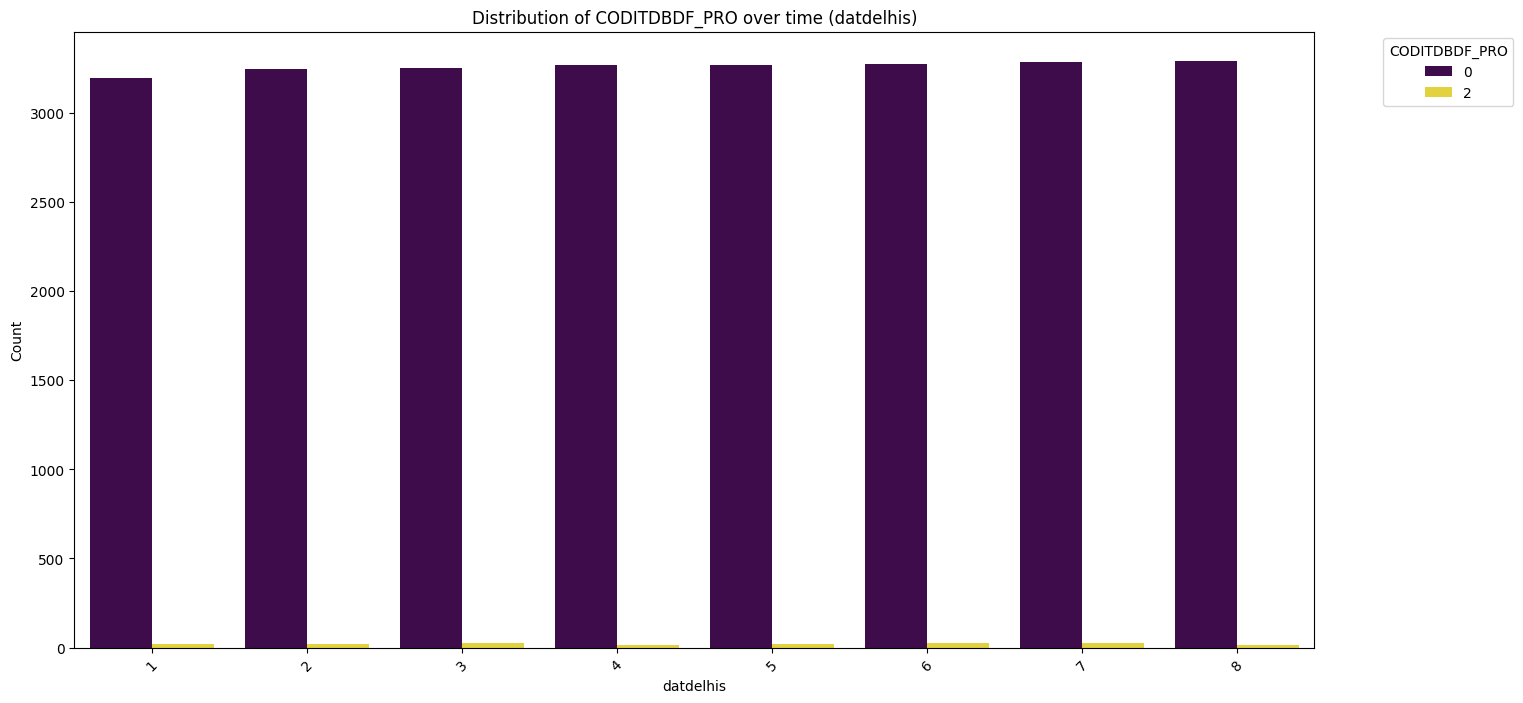

In [320]:
# ### CODITDBDF_PRO
print(sample['CODITDBDF_PRO'].unique())

# Distribution of CODITDBDF_PRO
plt.figure(figsize=(12, 6))
sns.countplot(x='CODITDBDF_PRO', data=sample, palette='viridis')
plt.title('Distribution of CODITDBDF_PRO')
plt.xlabel('CODITDBDF_PRO')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()


# Distribution of CODITDBDF_PRO over time
df = sample.sort_values('datdelhis')
plt.figure(figsize=(16, 8))
sns.countplot(x='datdelhis', hue='CODITDBDF_PRO', data=df, palette='viridis')
plt.title('Distribution of CODITDBDF_PRO over time (datdelhis)')
plt.xlabel('datdelhis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CODITDBDF_PRO', bbox_to_anchor=(1.05, 1), loc='upper left') # Place the legend outside the plot
plt.show()

### CRTAD_AG_NBJDE_BA

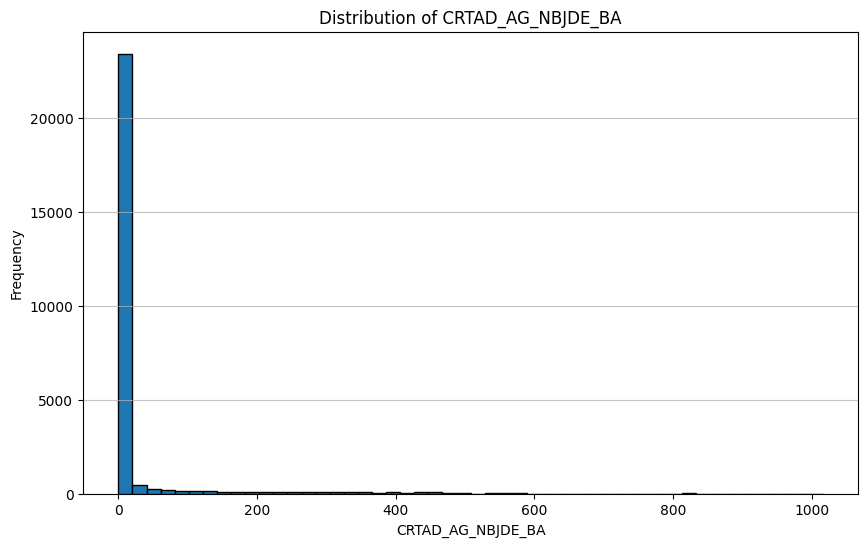

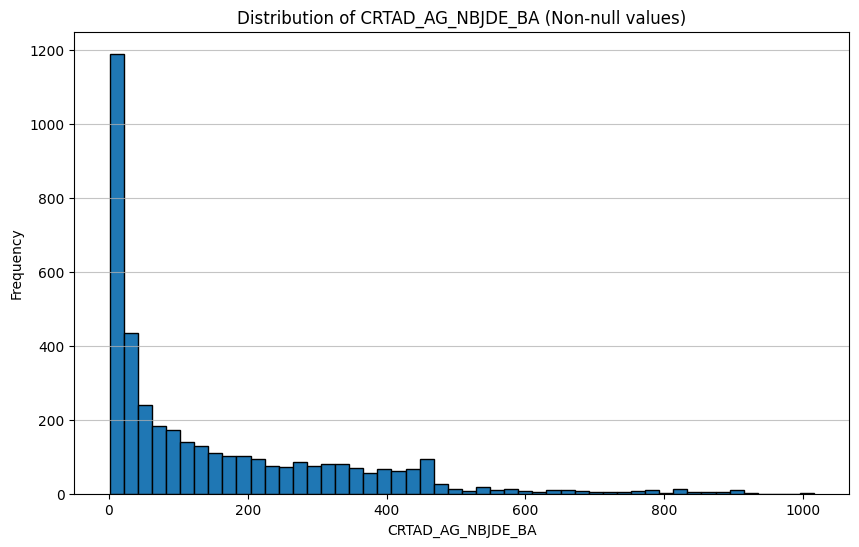

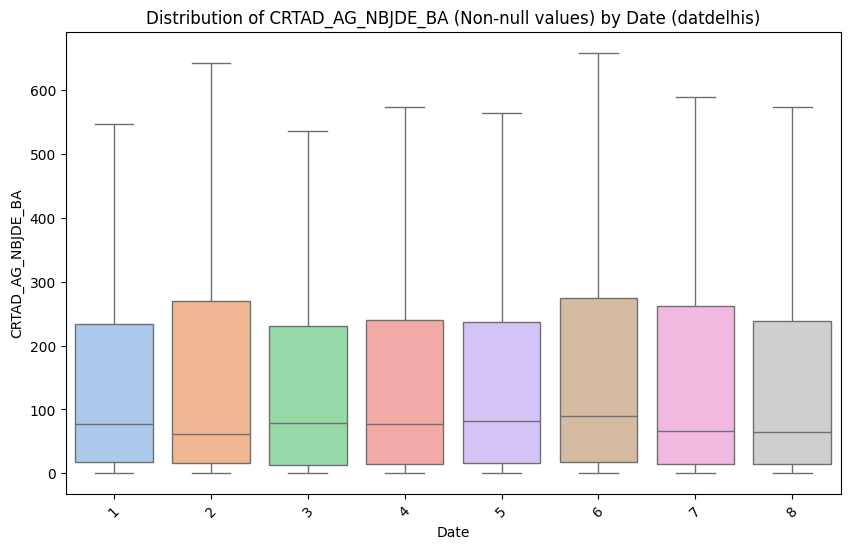

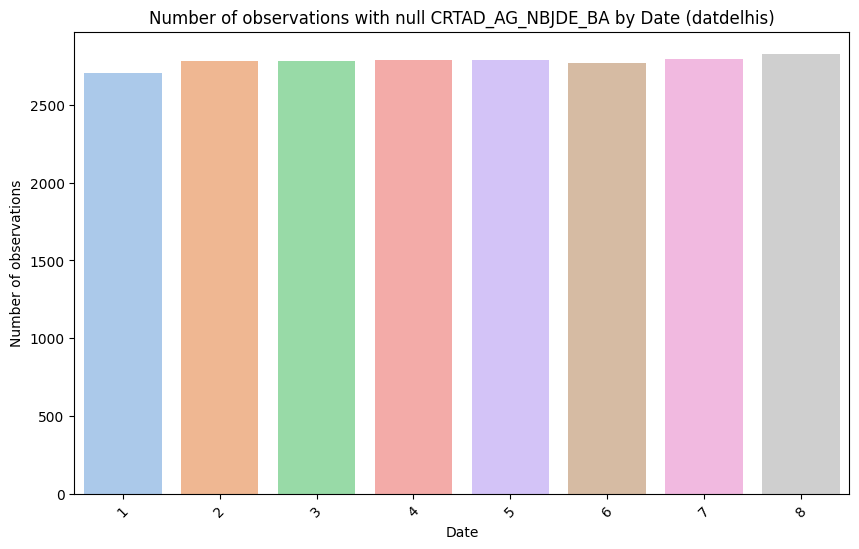

In [321]:
# Analyse de CRTAD_AG_NBJDE_BA

# Distribution de CRTAD_AG_NBJDE_BA
plt.figure(figsize=(10, 6))
plt.hist(sample['CRTAD_AG_NBJDE_BA'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBJDE_BA')
plt.xlabel('CRTAD_AG_NBJDE_BA')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(sample[sample['CRTAD_AG_NBJDE_BA'] != 0]['CRTAD_AG_NBJDE_BA'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBJDE_BA (Non-null values)')
plt.xlabel('CRTAD_AG_NBJDE_BA')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_NBJDE_BA par date
df = sample[sample['CRTAD_AG_NBJDE_BA'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_NBJDE_BA', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_NBJDE_BA (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_NBJDE_BA')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_NBJDE_BA nul par date
df = sample[sample['CRTAD_AG_NBJDE_BA'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_NBJDE_BA by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_NBJDE_BB

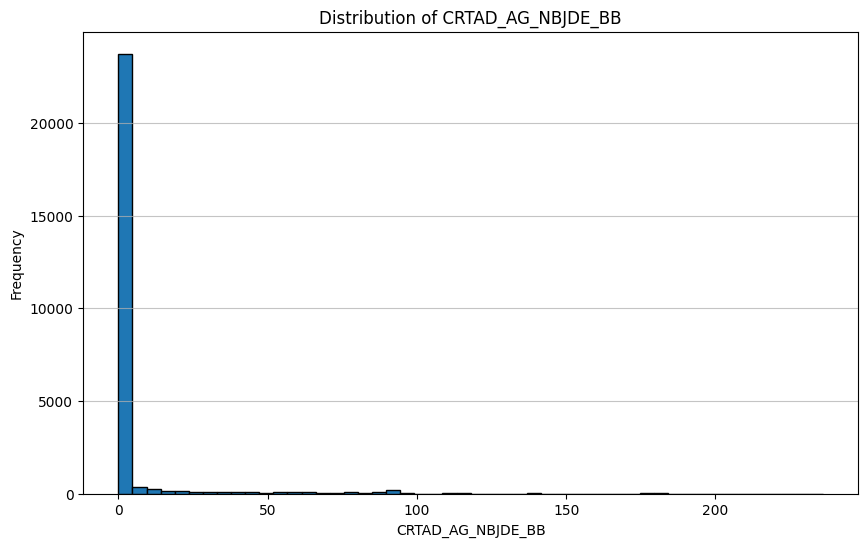

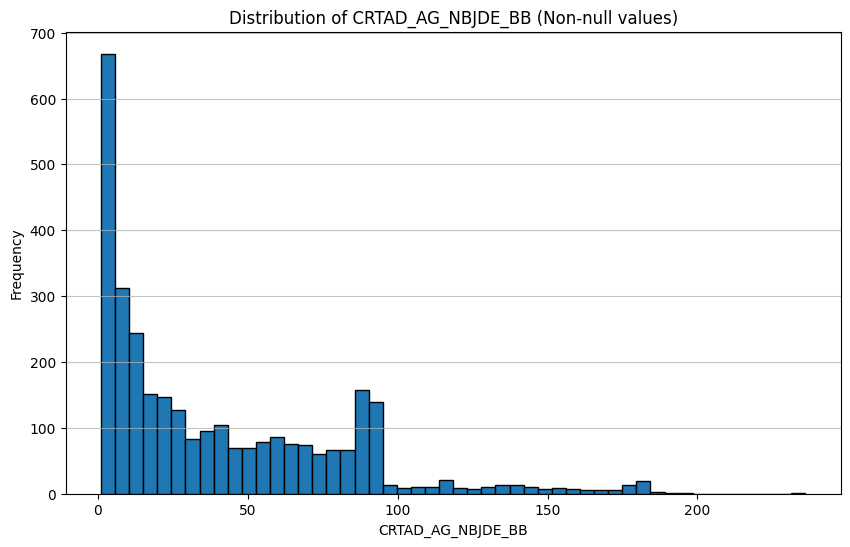

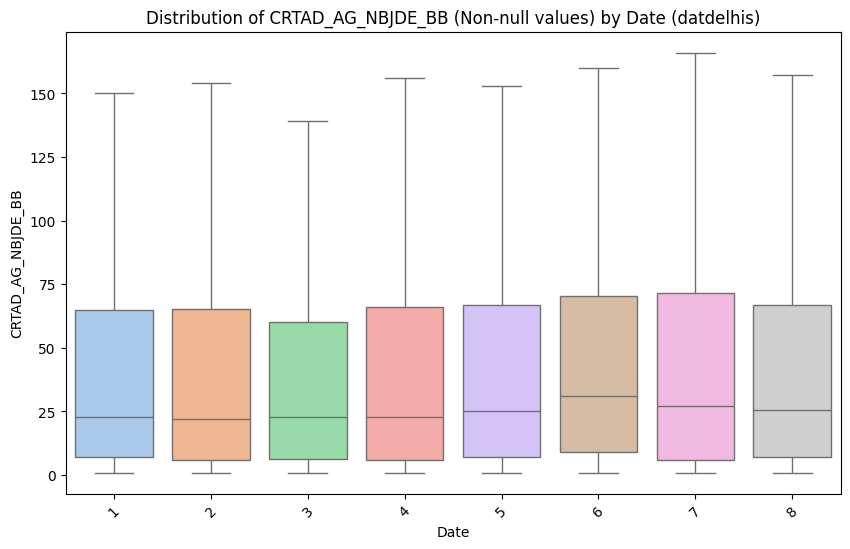

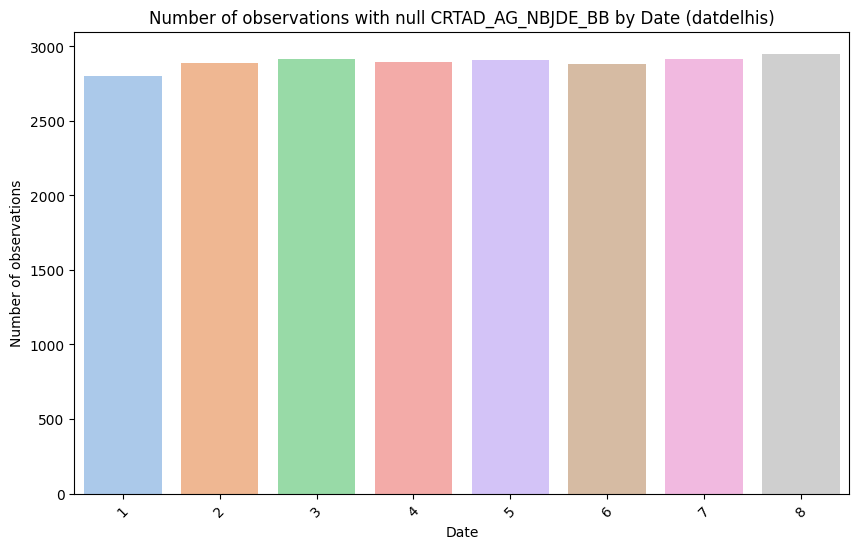

In [322]:
# Analyse de CRTAD_AG_NBJDE_BB

# Distribution de CRTAD_AG_NBJDE_BB
plt.figure(figsize=(10, 6))
plt.hist(sample['CRTAD_AG_NBJDE_BB'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBJDE_BB')
plt.xlabel('CRTAD_AG_NBJDE_BB')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(sample[sample['CRTAD_AG_NBJDE_BB'] != 0]['CRTAD_AG_NBJDE_BB'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBJDE_BB (Non-null values)')
plt.xlabel('CRTAD_AG_NBJDE_BB')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_NBJDE_BB par date
df = sample[sample['CRTAD_AG_NBJDE_BB'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_NBJDE_BB', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_NBJDE_BB (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_NBJDE_BB')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_NBJDE_BB nul par date
df = sample[sample['CRTAD_AG_NBJDE_BB'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_NBJDE_BB by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_NBJDE_BC

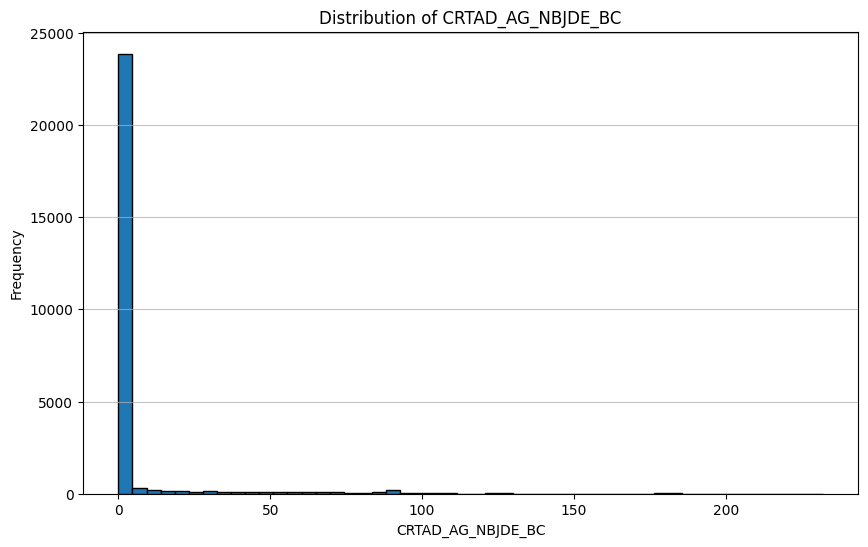

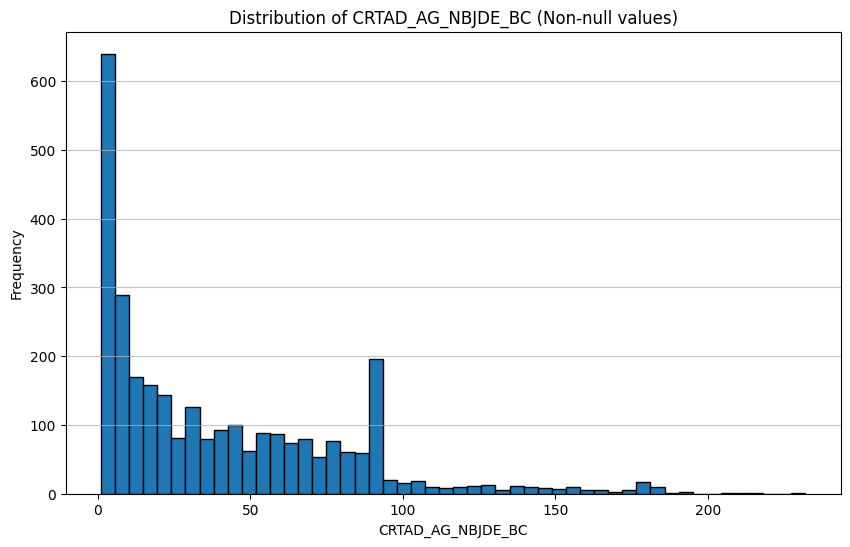

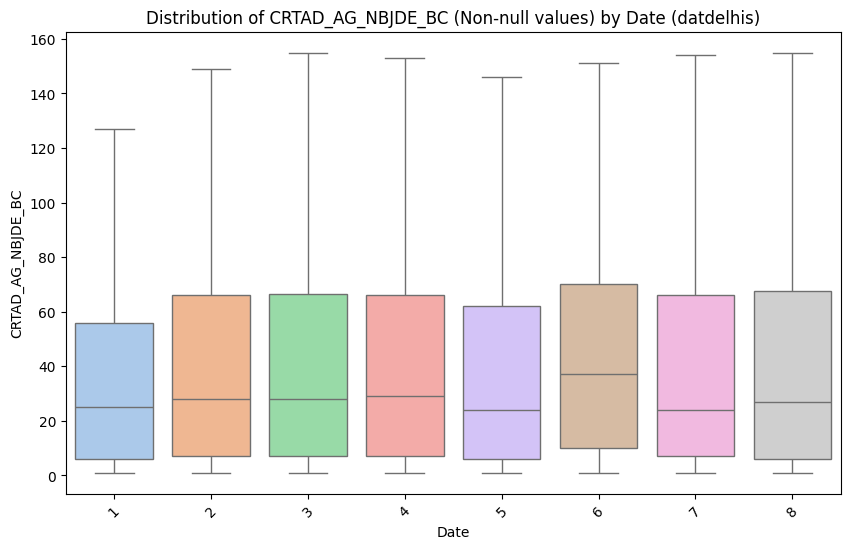

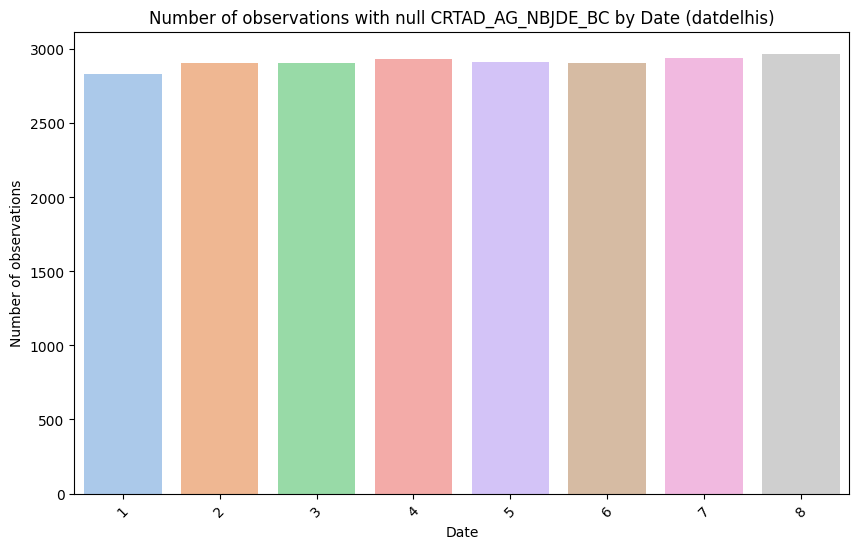

In [323]:
# Analyse de CRTAD_AG_NBJDE_BC

# Distribution de CRTAD_AG_NBJDE_BC
plt.figure(figsize=(10, 6))
plt.hist(sample['CRTAD_AG_NBJDE_BC'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBJDE_BC')
plt.xlabel('CRTAD_AG_NBJDE_BC')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(sample[sample['CRTAD_AG_NBJDE_BC'] != 0]['CRTAD_AG_NBJDE_BC'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_NBJDE_BC (Non-null values)')
plt.xlabel('CRTAD_AG_NBJDE_BC')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_NBJDE_BC par date
df = sample[sample['CRTAD_AG_NBJDE_BC'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_NBJDE_BC', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_NBJDE_BC (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_NBJDE_BC')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_NBJDE_BC nul par date
df = sample[sample['CRTAD_AG_NBJDE_BC'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_NBJDE_BC by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_SOLDE_T

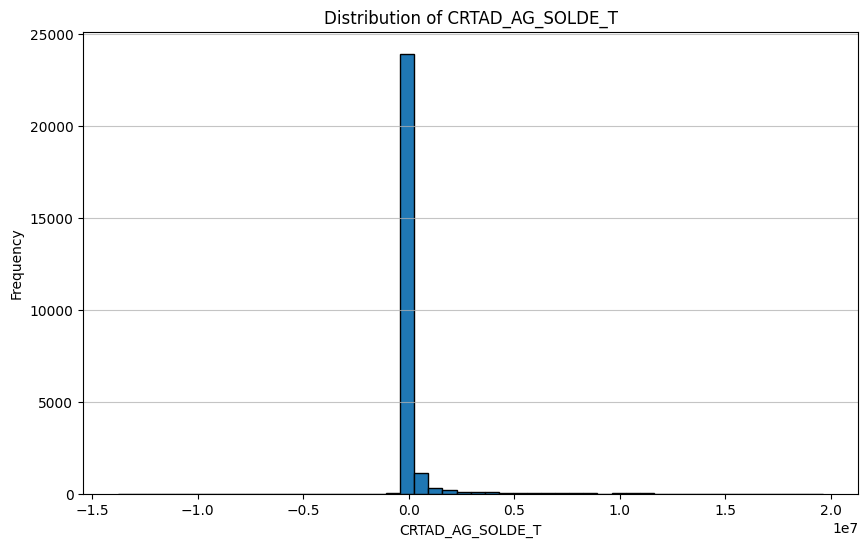

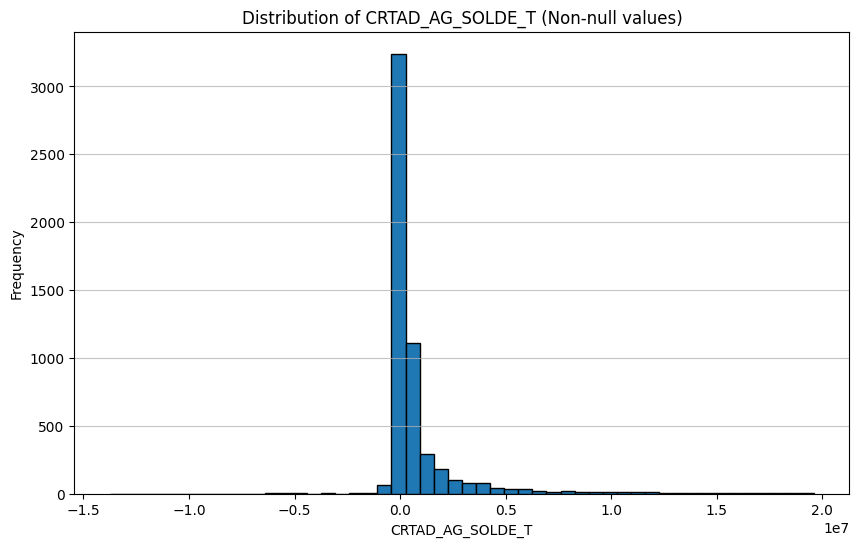

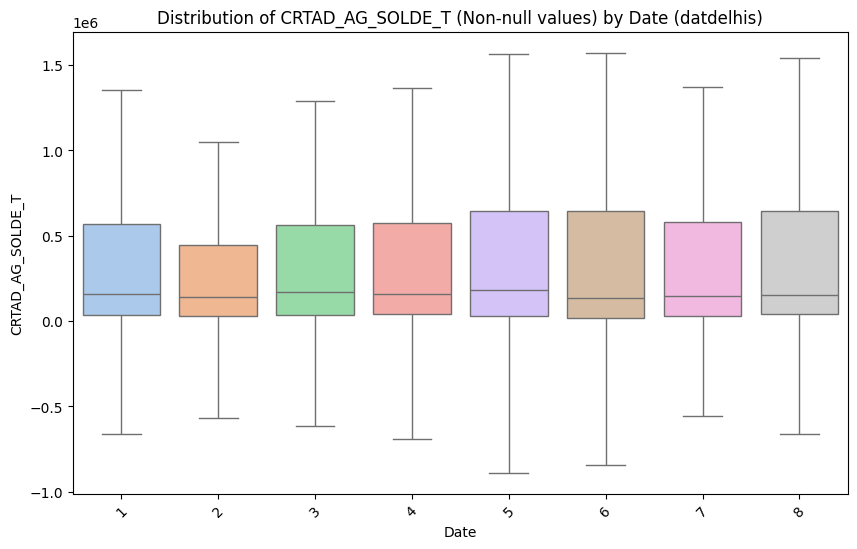

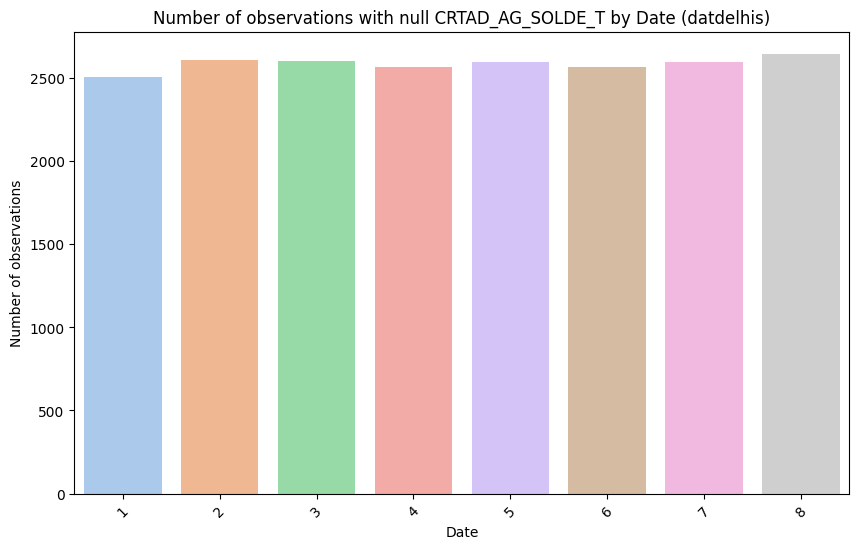

In [324]:
# Analyse de CRTAD_AG_SOLDE_T

df_filter = sample[sample['CRTAD_AG_SOLDE_T'] < 0.2e8]

# Distribution de CRTAD_AG_SOLDE_T
plt.figure(figsize=(10, 6))
plt.hist(df_filter['CRTAD_AG_SOLDE_T'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T')
plt.xlabel('CRTAD_AG_SOLDE_T')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(df_filter[df_filter['CRTAD_AG_SOLDE_T'] != 0]['CRTAD_AG_SOLDE_T'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T (Non-null values)')
plt.xlabel('CRTAD_AG_SOLDE_T')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_SOLDE_T par date
df = df_filter[df_filter['CRTAD_AG_SOLDE_T'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_SOLDE_T', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_SOLDE_T (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_SOLDE_T')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_SOLDE_T nul par date
df = sample[sample['CRTAD_AG_SOLDE_T'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_SOLDE_T by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_SOLDE_T1

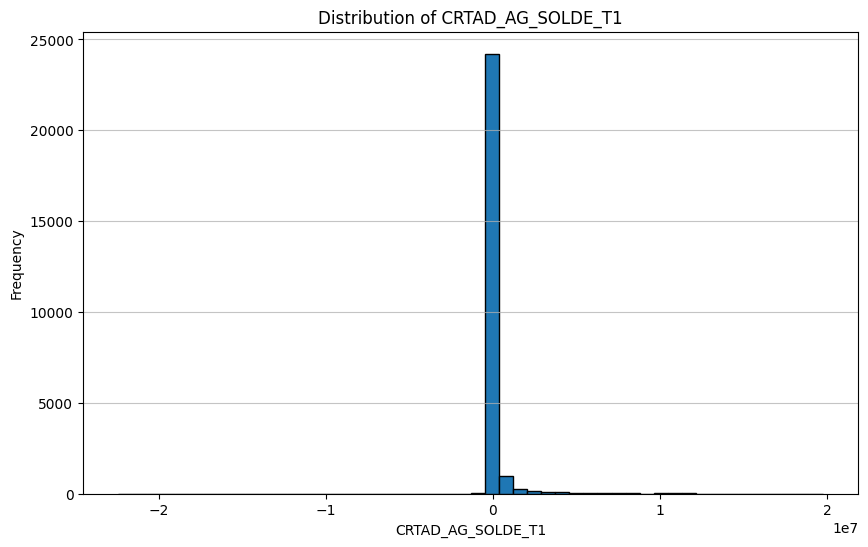

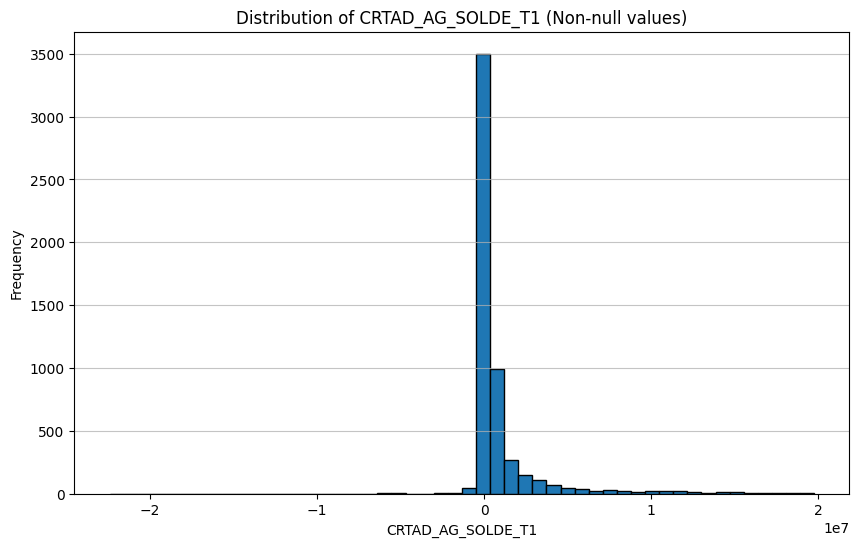

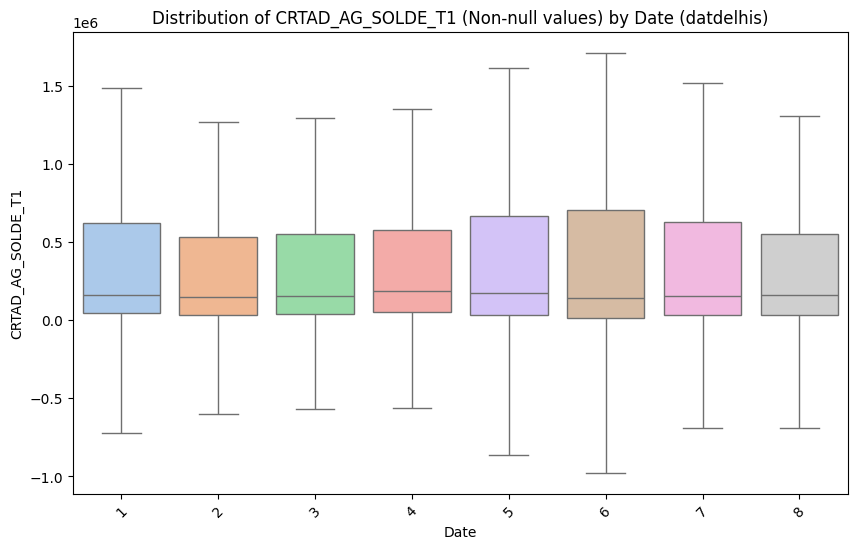

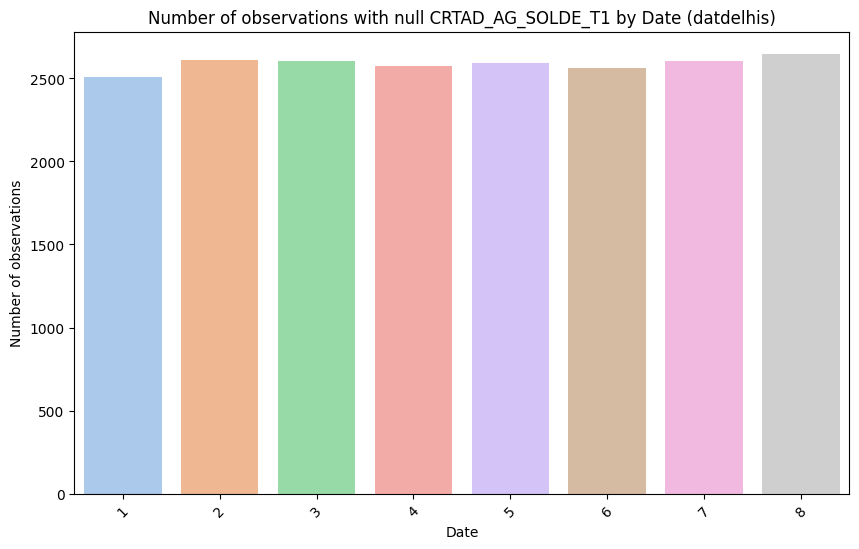

In [325]:
# Analyse de CRTAD_AG_SOLDE_T1

df_filter = sample[sample['CRTAD_AG_SOLDE_T1'] < 0.2e8]

# Distribution de CRTAD_AG_SOLDE_T1
plt.figure(figsize=(10, 6))
plt.hist(df_filter['CRTAD_AG_SOLDE_T1'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T1')
plt.xlabel('CRTAD_AG_SOLDE_T1')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(df_filter[df_filter['CRTAD_AG_SOLDE_T1'] != 0]['CRTAD_AG_SOLDE_T1'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T1 (Non-null values)')
plt.xlabel('CRTAD_AG_SOLDE_T1')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_SOLDE_T1 par date
df = df_filter[df_filter['CRTAD_AG_SOLDE_T1'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_SOLDE_T1', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_SOLDE_T1 (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_SOLDE_T1')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_SOLDE_T1 nul par date
df = sample[sample['CRTAD_AG_SOLDE_T1'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_SOLDE_T1 by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_SOLDE_T2

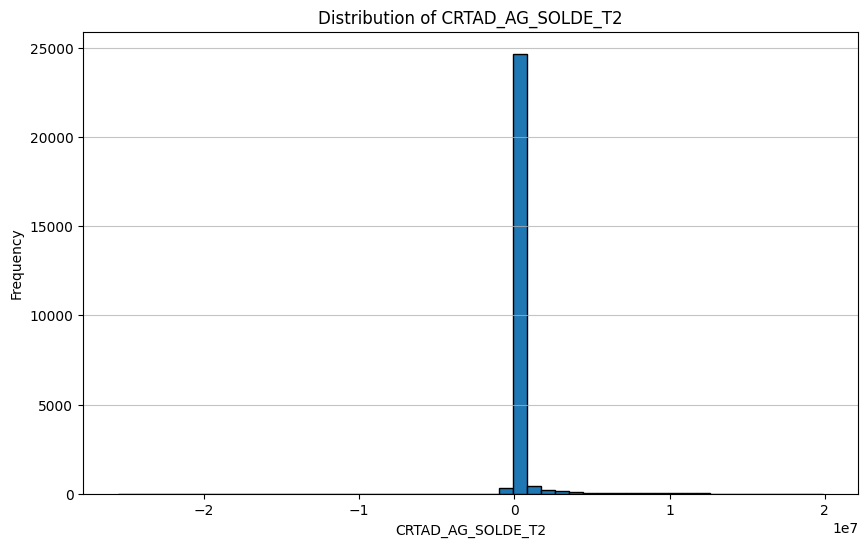

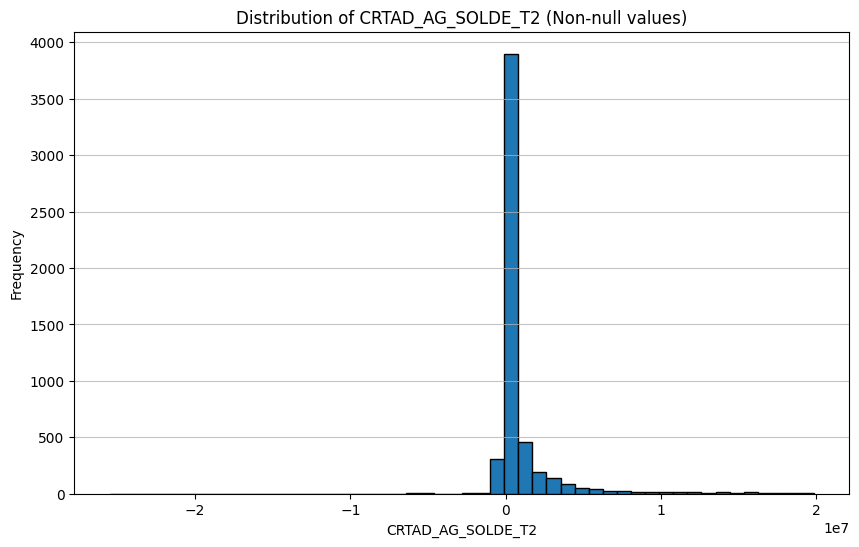

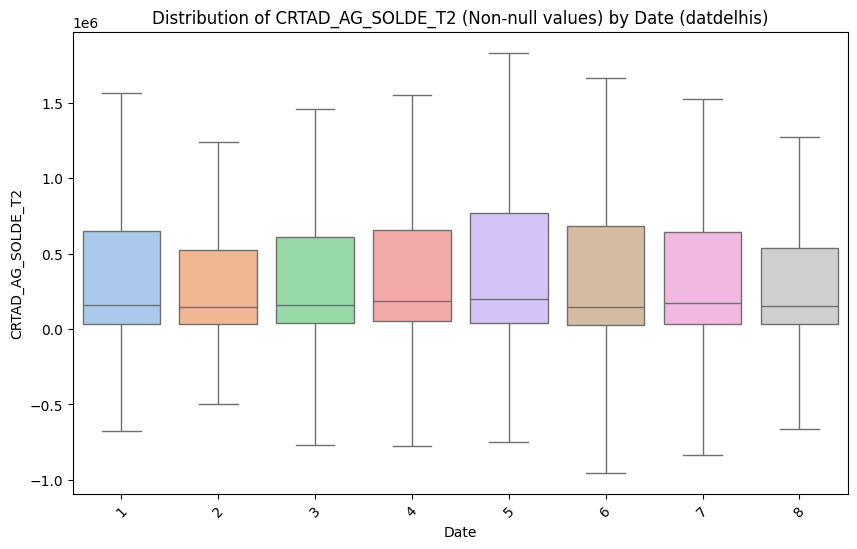

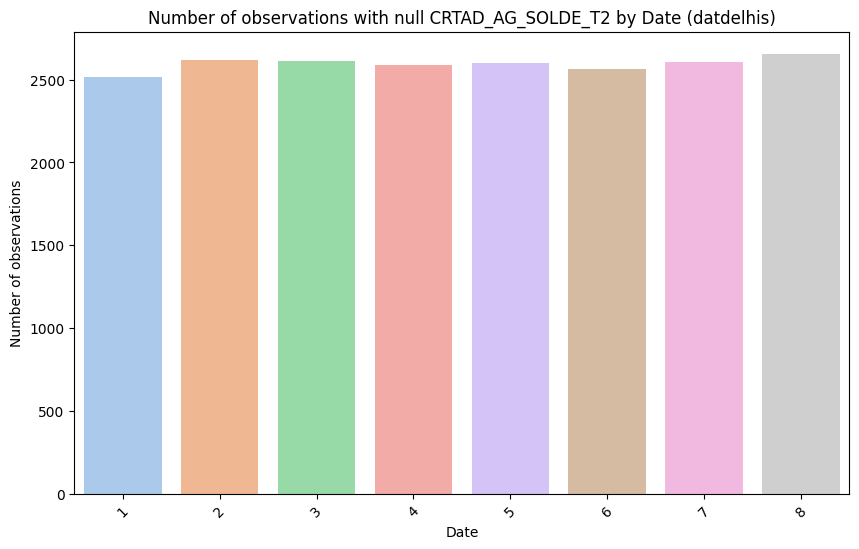

In [326]:
# Analyse de CRTAD_AG_SOLDE_T2

df_filter = sample[sample['CRTAD_AG_SOLDE_T2'] < 0.2e8]

# Distribution de CRTAD_AG_SOLDE_T2
plt.figure(figsize=(10, 6))
plt.hist(df_filter['CRTAD_AG_SOLDE_T2'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T2')
plt.xlabel('CRTAD_AG_SOLDE_T2')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(df_filter[df_filter['CRTAD_AG_SOLDE_T2'] != 0]['CRTAD_AG_SOLDE_T2'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T2 (Non-null values)')
plt.xlabel('CRTAD_AG_SOLDE_T2')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_SOLDE_T2 par date
df = df_filter[df_filter['CRTAD_AG_SOLDE_T2'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_SOLDE_T2', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_SOLDE_T2 (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_SOLDE_T2')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_SOLDE_T2 nul par date
df = sample[sample['CRTAD_AG_SOLDE_T2'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_SOLDE_T2 by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_SOLDE_T3

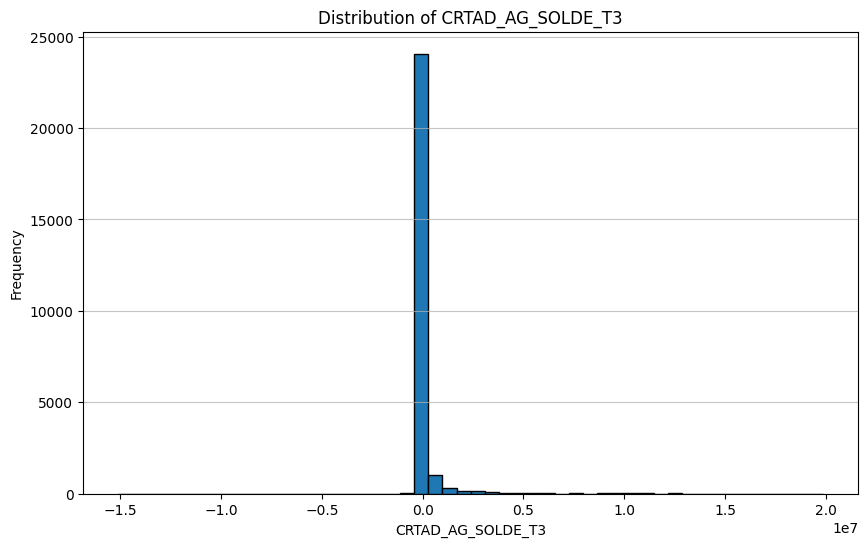

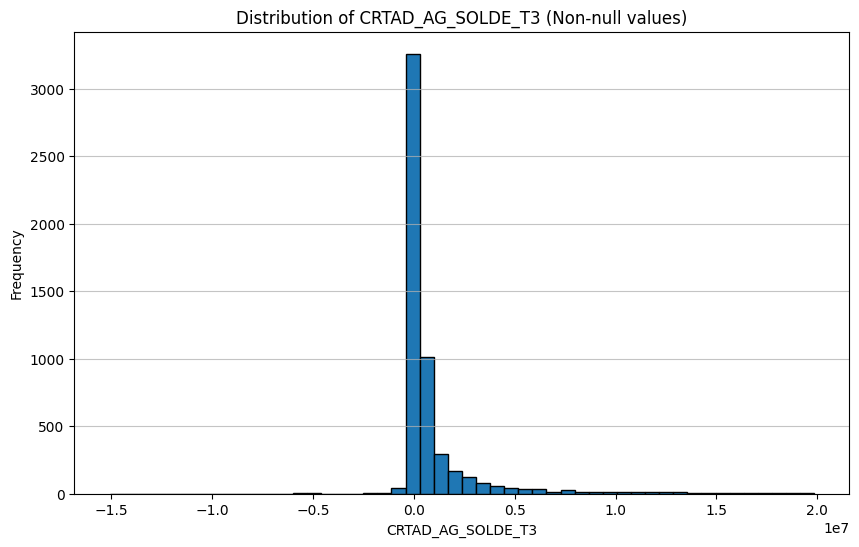

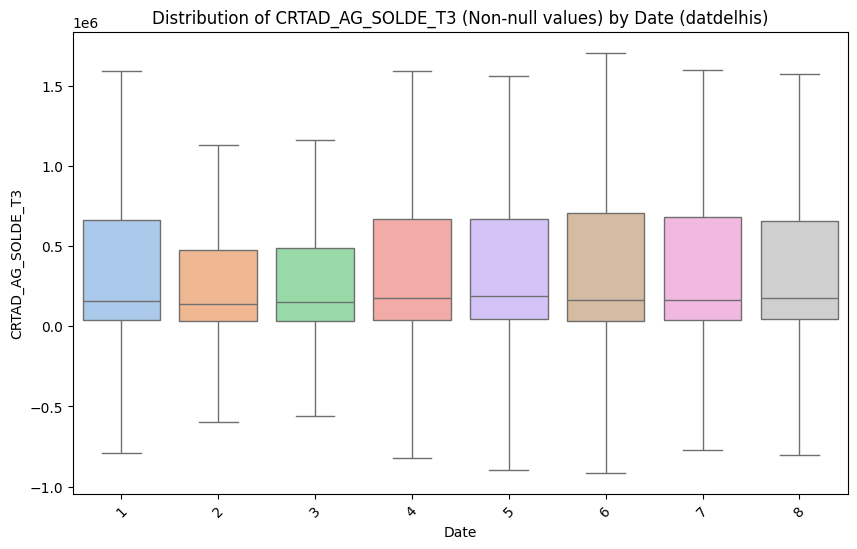

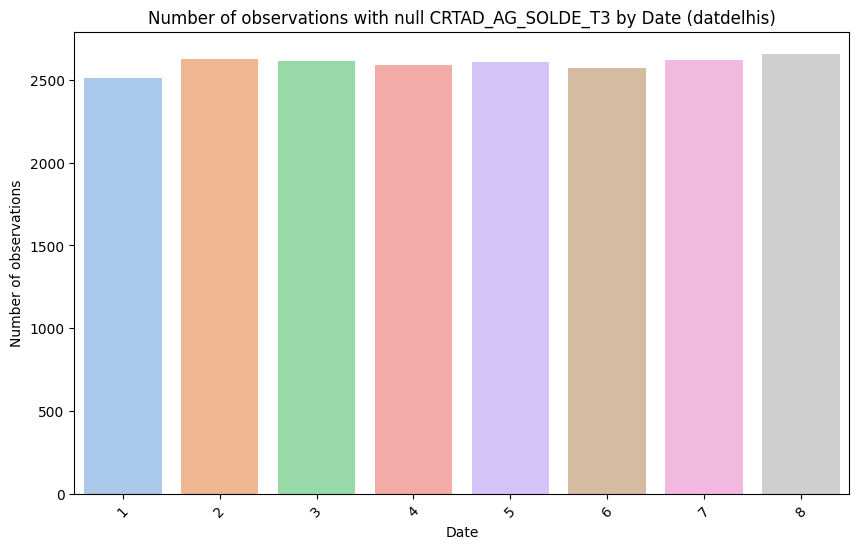

In [327]:
# Analyse de CRTAD_AG_SOLDE_T3

df_filter = sample[sample['CRTAD_AG_SOLDE_T3'] < 0.2e8]

# Distribution de CRTAD_AG_SOLDE_T3
plt.figure(figsize=(10, 6))
plt.hist(df_filter['CRTAD_AG_SOLDE_T3'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T3')
plt.xlabel('CRTAD_AG_SOLDE_T3')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(df_filter[df_filter['CRTAD_AG_SOLDE_T3'] != 0]['CRTAD_AG_SOLDE_T3'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T3 (Non-null values)')
plt.xlabel('CRTAD_AG_SOLDE_T3')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_SOLDE_T3 par date
df = df_filter[df_filter['CRTAD_AG_SOLDE_T3'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_SOLDE_T3', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_SOLDE_T3 (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_SOLDE_T3')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_SOLDE_T3 nul par date
df = sample[sample['CRTAD_AG_SOLDE_T3'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_SOLDE_T3 by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_SOLDE_T4

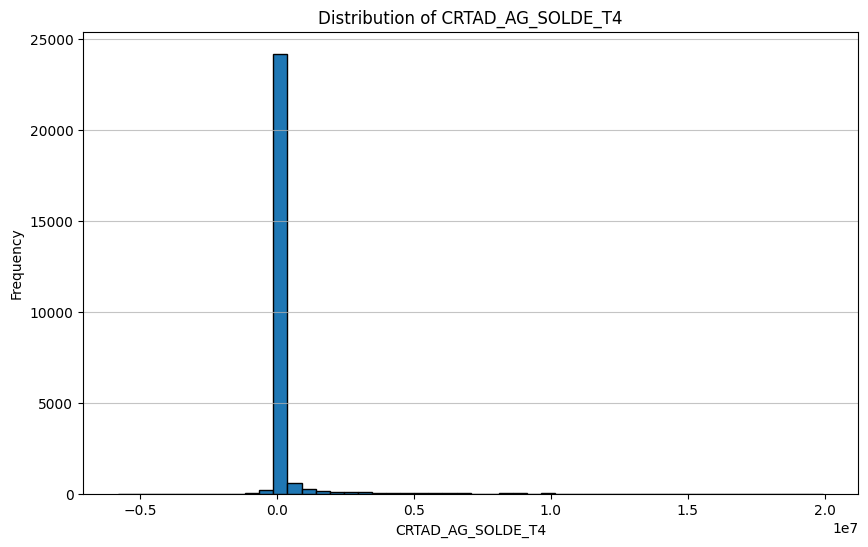

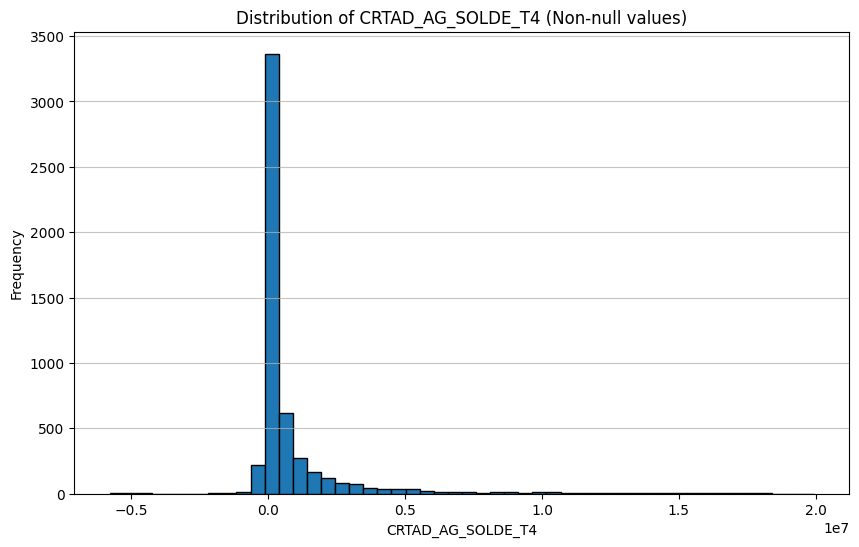

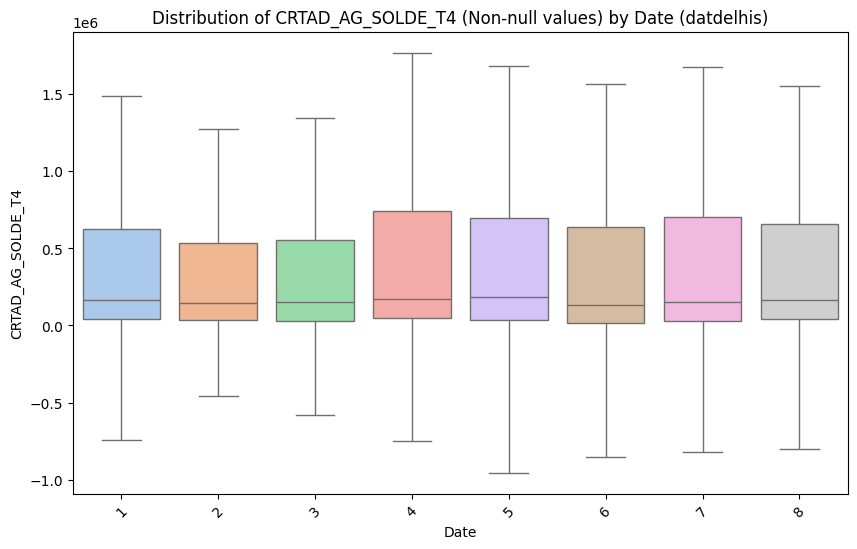

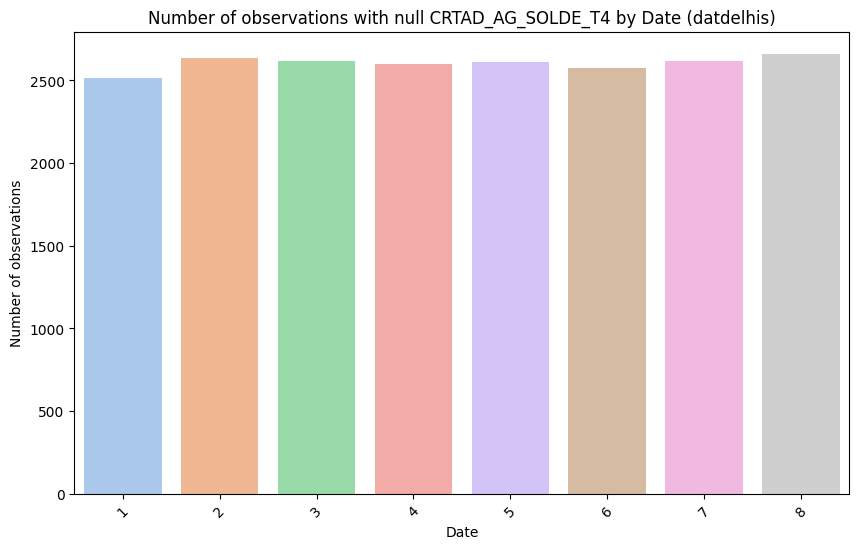

In [328]:
# Analyse de CRTAD_AG_SOLDE_T4

df_filter = sample[sample['CRTAD_AG_SOLDE_T4'] < 0.2e8]

# Distribution de CRTAD_AG_SOLDE_T4
plt.figure(figsize=(10, 6))
plt.hist(df_filter['CRTAD_AG_SOLDE_T4'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T4')
plt.xlabel('CRTAD_AG_SOLDE_T4')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(df_filter[df_filter['CRTAD_AG_SOLDE_T4'] != 0]['CRTAD_AG_SOLDE_T4'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE_T4 (Non-null values)')
plt.xlabel('CRTAD_AG_SOLDE_T4')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_SOLDE_T4 par date
df = df_filter[df_filter['CRTAD_AG_SOLDE_T4'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_SOLDE_T4', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_SOLDE_T4 (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_SOLDE_T4')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_SOLDE_T4 nul par date
df = sample[sample['CRTAD_AG_SOLDE_T4'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_SOLDE_T4 by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()

### CRTAD_AG_SOLDE

In [329]:
# Liste des colonnes représentant les soldes par trimestre
solde_columns = ['CRTAD_AG_SOLDE_T', 'CRTAD_AG_SOLDE_T1', 'CRTAD_AG_SOLDE_T2', 'CRTAD_AG_SOLDE_T3', 'CRTAD_AG_SOLDE_T4']

# Fonction pour calculer le risque basé sur les variations, la tendance et le niveau absolu moyen
def get_solde_risk(sample, alpha, beta, gamma):
    # Calcul des variations entre trimestres successifs
    variations = []
    for i in range(1, len(solde_columns)):
        variations.append(sample[solde_columns[i]] - sample[solde_columns[i - 1]])

    # Conversion des variations en DataFrame pour faciliter les opérations
    variations_df = pd.DataFrame(variations).T  # Chaque ligne correspond à une observation

    # Calcul de la variation trimestrielle moyenne par ligne
    variation_trimestrielle_moyenne = variations_df.mean(axis=1)

    # Calcul de la tendance globale par ligne
    tendance_globale = sample[solde_columns[0]] - sample[solde_columns[-1]]

    # Calcul du niveau absolu moyen par ligne
    niveau_absolu_moyen = sample[solde_columns].mean(axis=1)

    # Calcul du risque selon la formule donnée
    risque = (
        alpha * variation_trimestrielle_moyenne +
        beta * tendance_globale +
        gamma * niveau_absolu_moyen
    )

    return risque

# Appel de la fonction avec des poids alpha, beta et gamma
risque = get_solde_risk(sample, alpha=1/3, beta=1/3, gamma=1/3)

sample['CRTAD_AG_SOLDE'] = risque

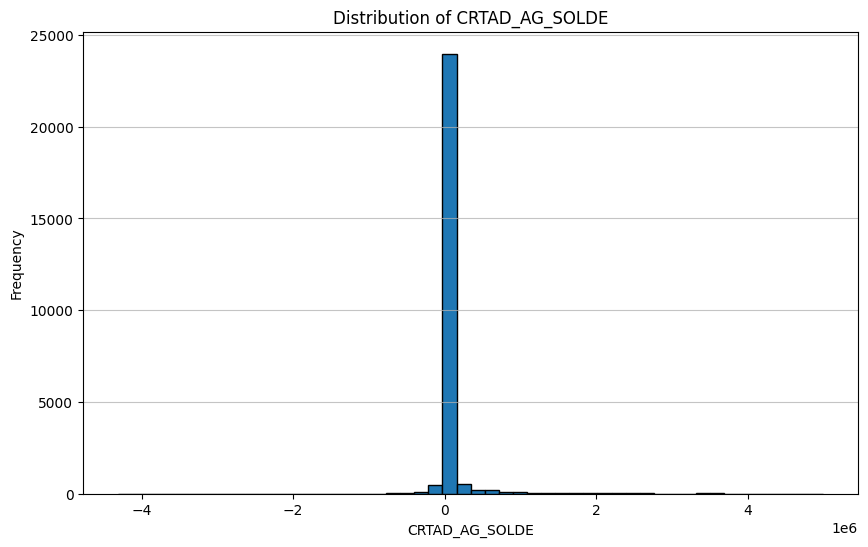

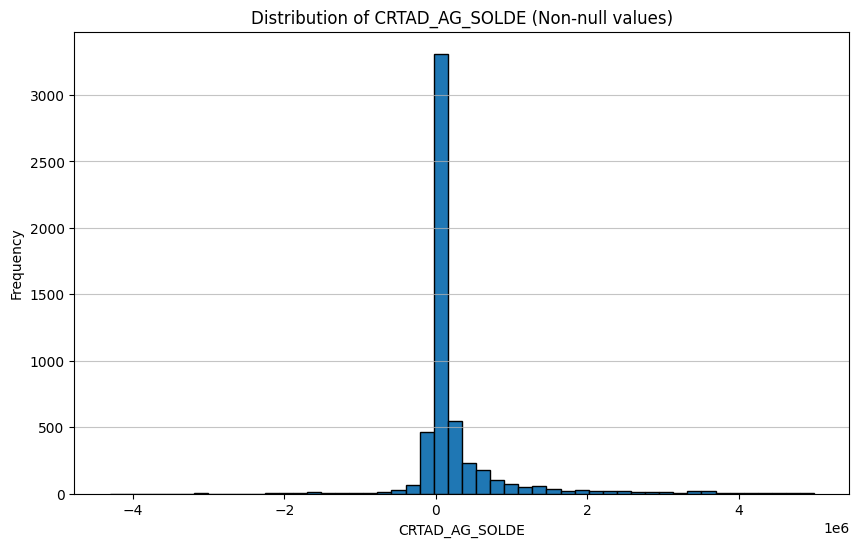

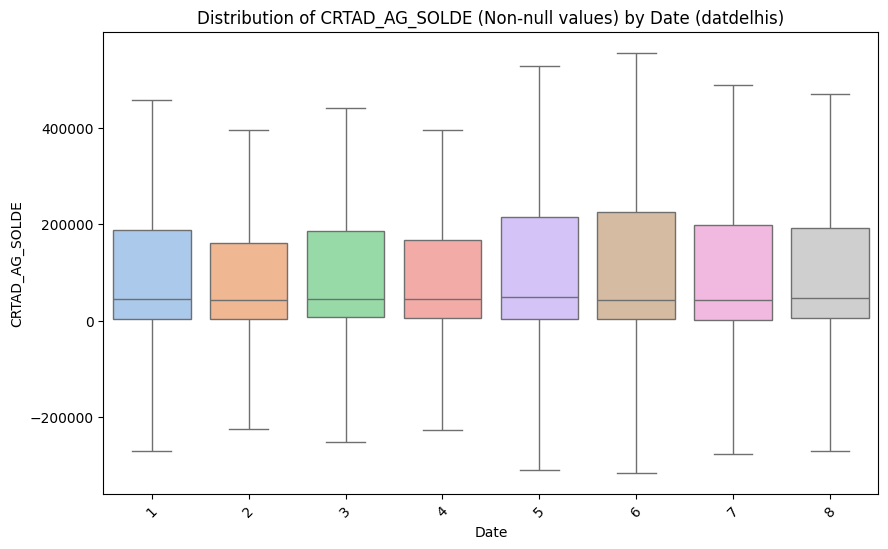

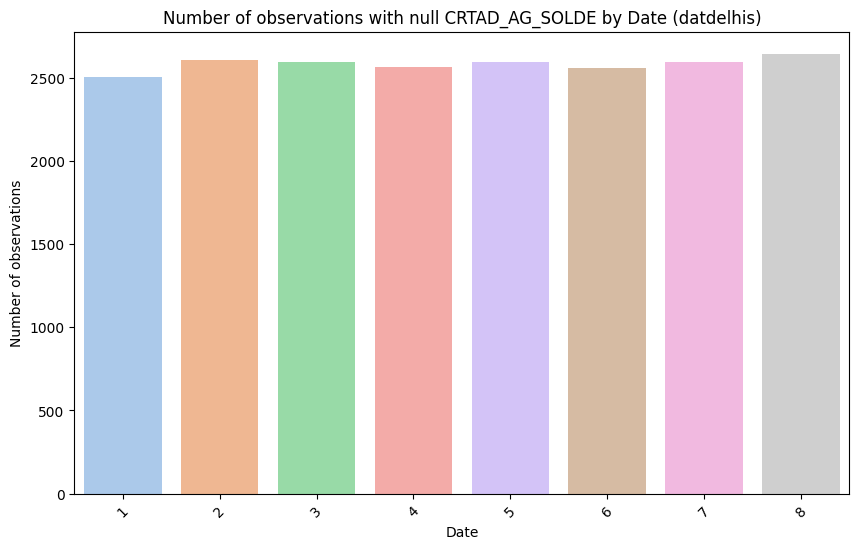

In [330]:
# Analyse de CRTAD_AG_SOLDE

df_filter = sample[sample['CRTAD_AG_SOLDE'] < 0.5e7]
df_filter = df_filter[df_filter['CRTAD_AG_SOLDE'] > -0.5e7]

# Distribution de CRTAD_AG_SOLDE
plt.figure(figsize=(10, 6))
plt.hist(df_filter['CRTAD_AG_SOLDE'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE')
plt.xlabel('CRTAD_AG_SOLDE')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme des valeurs non nulles
plt.figure(figsize=(10, 6))
plt.hist(df_filter[df_filter['CRTAD_AG_SOLDE'] != 0]['CRTAD_AG_SOLDE'], bins=50, edgecolor='black')
plt.title('Distribution of CRTAD_AG_SOLDE (Non-null values)')
plt.xlabel('CRTAD_AG_SOLDE')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot de CRTAD_AG_SOLDE par date
df = df_filter[df_filter['CRTAD_AG_SOLDE'] != 0]
df = df.sort_values('datdelhis')

plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTAD_AG_SOLDE', showfliers=False, data=df, palette='pastel')
plt.title('Distribution of CRTAD_AG_SOLDE (Non-null values) by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('CRTAD_AG_SOLDE')
plt.xticks(rotation=45)
plt.show()

# Nombre d'observations avec CRTAD_AG_SOLDE nul par date
df = sample[sample['CRTAD_AG_SOLDE'] == 0]
df = df.sort_values('datdelhis')

observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')
plt.title('Number of observations with null CRTAD_AG_SOLDE by Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Number of observations')
plt.xticks(rotation=45)
plt.show()